In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import math

In [16]:
df=pd.read_excel('TOC_All Data.xlsx')

In [20]:
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Apply the mask to the correlation matrix
lower_triangle = corr.mask(mask)

# Save the lower triangle of the correlation matrix to a CSV file
lower_triangle.to_csv('lower_triangle_correlation_matrix.csv', index=True)

In [8]:
df.columns

Index(['RT', 'DEN', 'CNL', 'AC', 'TOC (%)'], dtype='object')

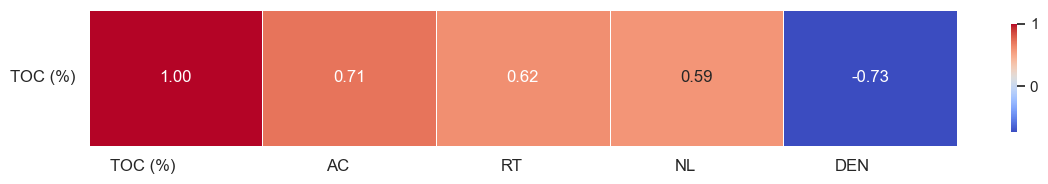

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source

# Assuming 'df' is your DataFrame
# Extract correlations with 'SPP'
spp_corr = df.corr()[['TOC (%)']].sort_values(by='TOC (%)', ascending=False).T

# Generate a horizontal heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(12, 2))  # Adjust width and height for horizontal layout
sns.heatmap(
    spp_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=False
)

# Customize the plot
#plt.title('Correlation of SPP with Other Parameters', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=0, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.tight_layout()
plt.savefig('spp_corr_horizontal.png', dpi=1000, bbox_inches='tight')
plt.show()


Ranked Models:
          Method        R2      RMSE       MAE  R2 Rank  RMSE Rank  MAE Rank  \
0            XGB  0.876253  0.640425  0.497990      1.0        2.0       2.0   
1            SVM  0.797662  0.592219  0.495429      4.0        1.0       1.0   
2             DT  0.856853  0.688796  0.546290      2.0        3.0       3.0   
3             ML  0.822130  0.775841  0.630947      3.0        4.0       4.0   
4            MLR  0.754691  1.013237  0.760552      5.0        5.0       5.0   
5  Passey Method  0.620529  1.017589  0.791276      6.0        6.0       6.0   

   Overall Rank  
0           5.0  
1           6.0  
2           8.0  
3          11.0  
4          15.0  
5          18.0  


C:\Users\Asus\AppData\Local\Temp\ipykernel_18888\2545608936.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Overall Rank', data=df, palette='viridis', order=df['Method'])


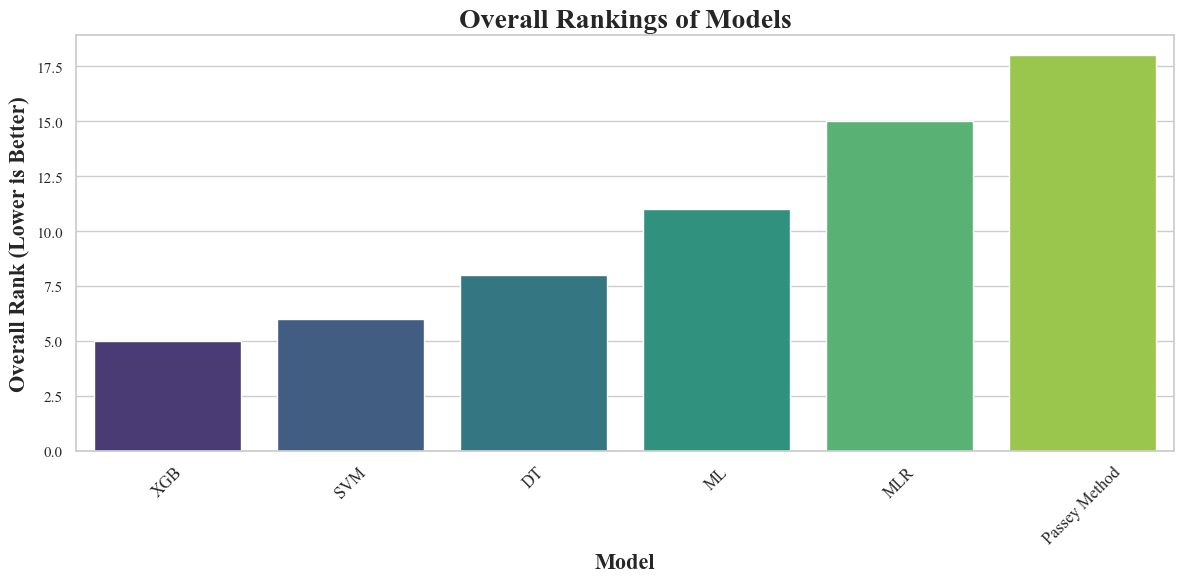

C:\Users\Asus\AppData\Local\Temp\ipykernel_18888\2545608936.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='R2', data=df, palette='coolwarm', order=df['Method'])


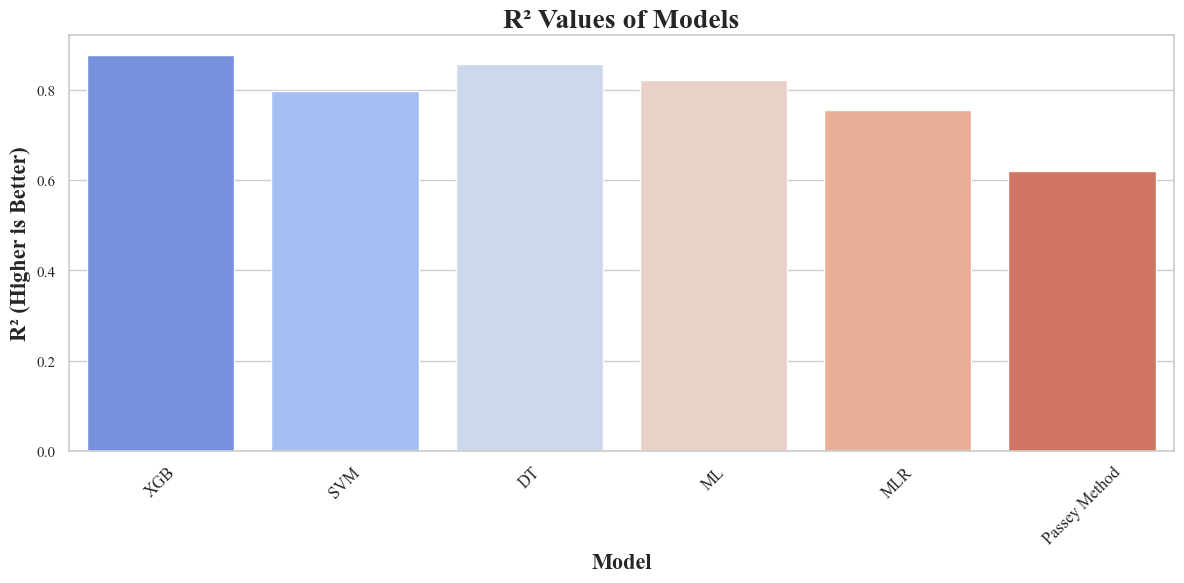

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data
data = {
    "Method": ["Passey Method", "MLR", "SVM", "DT", "XGB", "ML"],
    "R2": [0.620529, 0.754691, 0.797662, 0.856853, 0.876253, 0.822130],
    "RMSE": [1.017589, 1.013237, 0.592219, 0.688796, 0.640425, 0.775841],
    "MAE": [0.791276, 0.760552, 0.495429, 0.546290, 0.497990, 0.630947],
}

# Create DataFrame
df = pd.DataFrame(data)

# Rank models
df['R2 Rank'] = df['R2'].rank(ascending=False)
df['RMSE Rank'] = df['RMSE'].rank(ascending=True)
df['MAE Rank'] = df['MAE'].rank(ascending=True)
df['Overall Rank'] = df[['R2 Rank', 'RMSE Rank', 'MAE Rank']].sum(axis=1)

# Sort by Overall Rank
df = df.sort_values(by='Overall Rank').reset_index(drop=True)
df.to_csv('RANK.CSV')
# Display ranked DataFrame
print("Ranked Models:")
print(df)

# Plot Rankings
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='Overall Rank', data=df, palette='viridis', order=df['Method'])
plt.title('Overall Rankings of Models', fontsize=20, fontweight='bold')
plt.xlabel('Model', fontsize=16, fontweight='bold')
plt.ylabel('Overall Rank (Lower is Better)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig("model_rankings.png", dpi=300)
plt.show()

# Plot R² Values
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='R2', data=df, palette='coolwarm', order=df['Method'])
plt.title('R² Values of Models', fontsize=20, fontweight='bold')
plt.xlabel('Model', fontsize=16, fontweight='bold')
plt.ylabel('R² (Higher is Better)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig("model_r2_values.png", dpi=300)
plt.show()



In [3]:
df

Depth         RD     BDC    NPHIC      ACC    RHOZ        SP  \
0    3982.257080  25.034900  0.0896  23.7691  12.1684  2.9418 -275.4375   
1    3982.561758  22.251100  0.0893  36.2486  12.2275  2.9511 -275.0000   
2    3982.866406  16.991800  0.0963  35.6541  12.2743  2.9750 -273.9375   
3    3983.171053  14.521400  0.0858  39.0889  12.2255  2.9379 -275.4375   
4    3983.475701  13.328300  0.0771  46.0304  12.3761  2.9526 -276.3750   
..           ...        ...     ...      ...      ...     ...       ...   
187  4039.227309   6.508999  0.1488  35.2148  12.4678  3.0411 -276.4375   
188  4039.531956   6.629900  0.1382  34.0456  12.4696  3.0449 -275.3125   
189  4039.836604   8.165100  0.1363  31.8556  12.4400  3.0178 -274.7500   
190  4040.141252   9.447600  0.1255  32.6244  12.4205  3.0324 -273.8750   
191  4040.445930  10.901000  0.1267  32.2506  12.4115  3.0407 -273.4375   

       TNPH     WCL(%)  
0    0.3095  17.700000  
1    0.3183  16.457480  
2    0.3344  15.459973  
3    0.3365  14.707480  
4    0.3625  14.200000  
..      ...        ...  
187  0.4625  12.906283  
188  0.4474  14.678365  
189  0.4218  16.618012  
190  0.4189  18.725224  
191  0.4324  21.000000  

[192 rows x 9 columns]

In [11]:
df.columns

Index(['RT', 'DEN', 'CNL', 'AC', 'TOC (%)'], dtype='object')

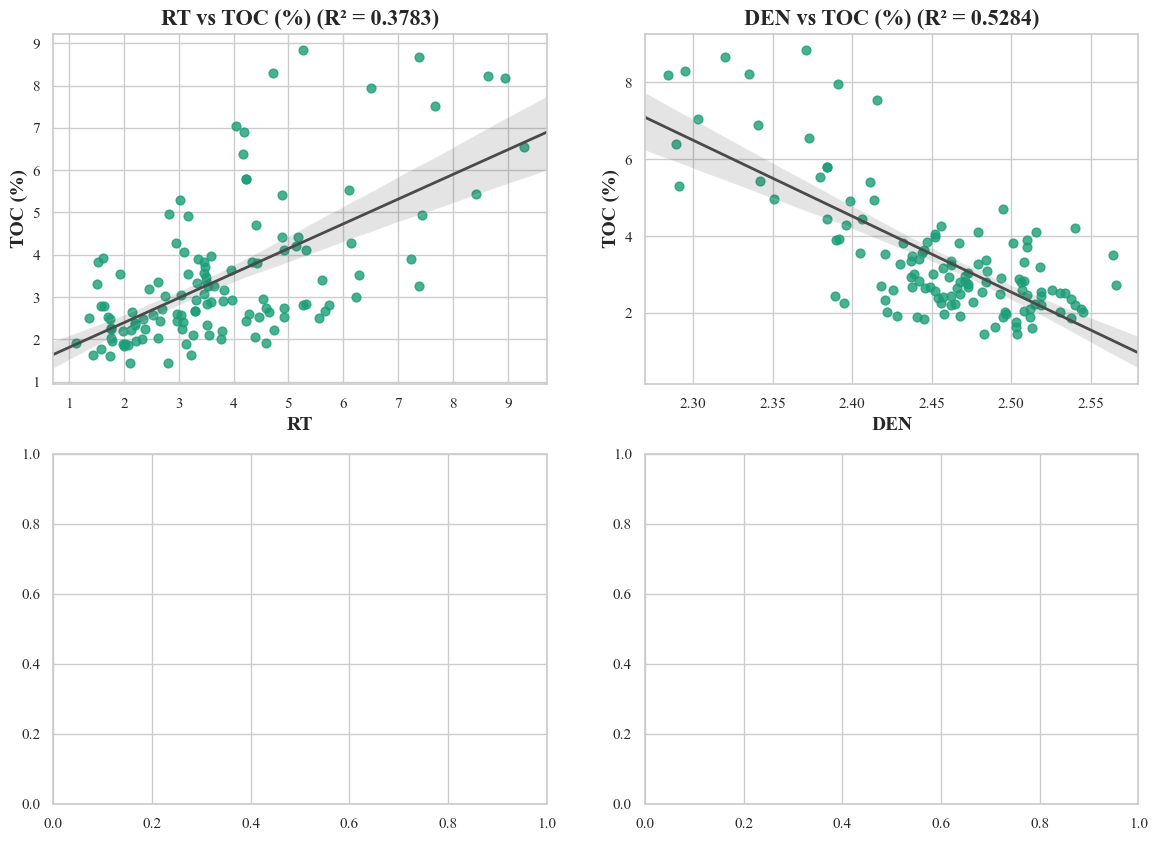

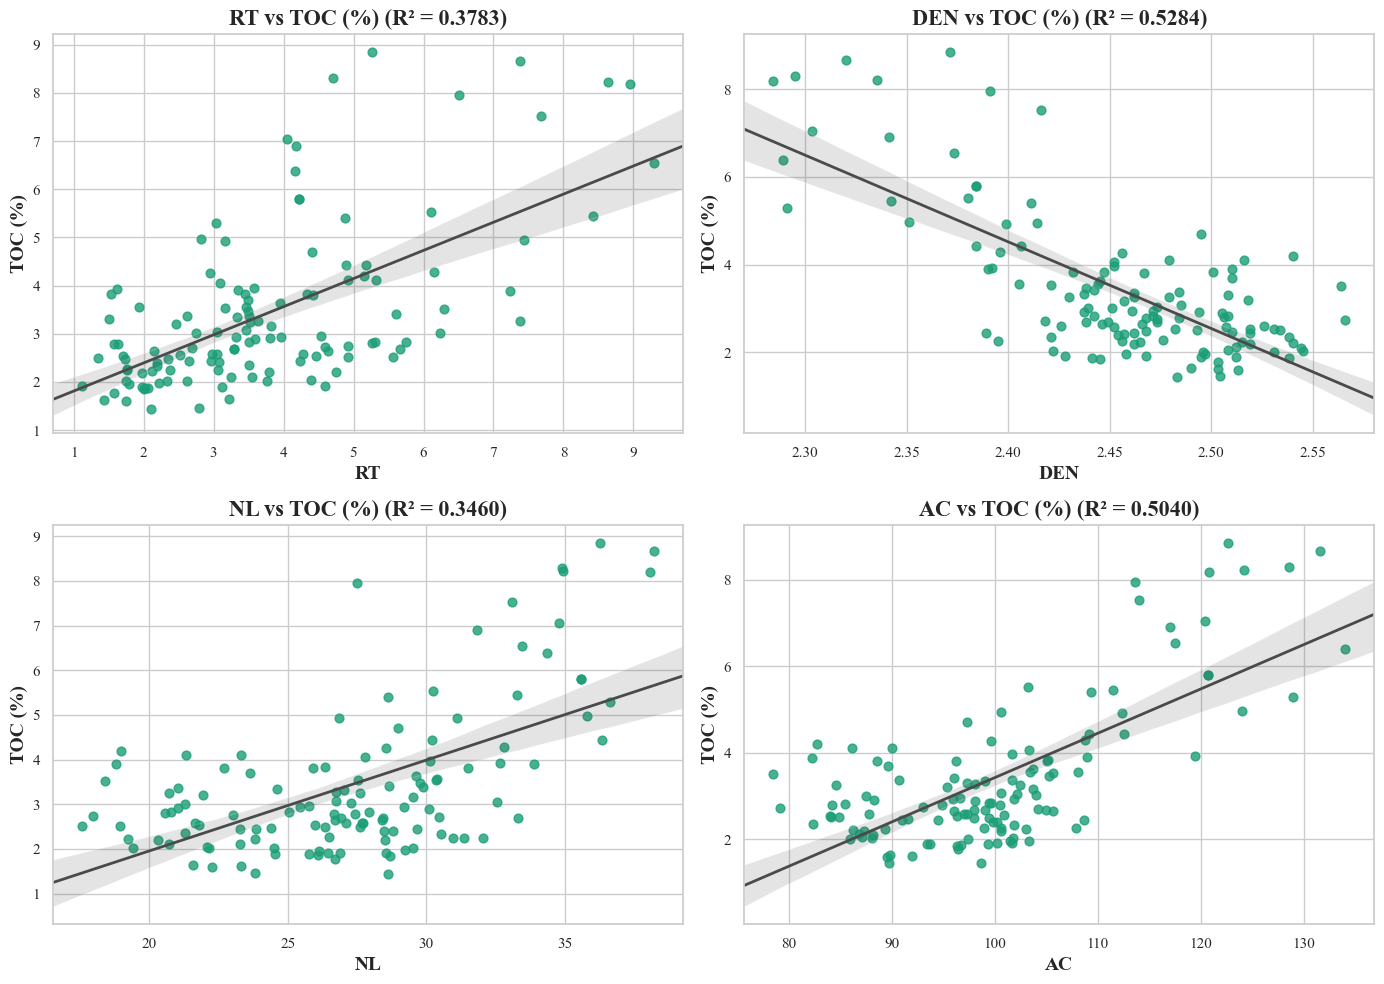

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define predictors and target
predictors = ['RT', 'DEN', 'NL', 'AC']
target = 'TOC (%)'

# Seaborn settings
sns.set(style="whitegrid", font="Times New Roman", rc={"axes.labelsize": 14, "axes.titlesize": 20})

# Set up a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy iteration

# Define color palette
scatter_color = '#1b9e77'
line_color = '#4a4a4a'

# Iterate through predictors
for i, predictor in enumerate(predictors):
    X = df[[predictor]].values
    y = df[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    sns.regplot(
        x=predictor, y=target, data=df, ax=axs[i],
        scatter_kws={'color': scatter_color, 's': 40},
        line_kws={'color': line_color, 'lw': 2},
        ci=90, truncate=False
    )
    axs[i].set_title(f'{predictor} vs {target} (R² = {r2:.4f})', fontsize=16, fontweight='bold')
    axs[i].set_xlabel(f'{predictor}', fontsize=14, fontweight='bold')
    axs[i].set_ylabel(f'{target}', fontsize=14, fontweight='bold')

    # Adjust x-axis scale if predictor is 'RD'
    if predictor == 'RD':
        axs[i].set_xscale('log')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig('crossplot_2.png', dpi=1000, bbox_inches='tight')
plt.show()




In [14]:
import pandas as pd
from scipy.stats import skew, kurtosis


summary_T2 = df.describe().T

summary_T2['skewness'] = df.skew()
summary_T2['kurtosis'] = df.kurtosis()


summary_T2.to_csv('summary.csv', index=True) 

In [ ]:
summary_T2

In [6]:
df.columns

Index(['TVD', 'APRES', 'ECD', 'WOB', 'HKLD', 'TORQUE', 'SURF_RPM', 'FLOWIN',
       'ROP', 'SPP'],
      dtype='object')

In [ ]:
df.columns

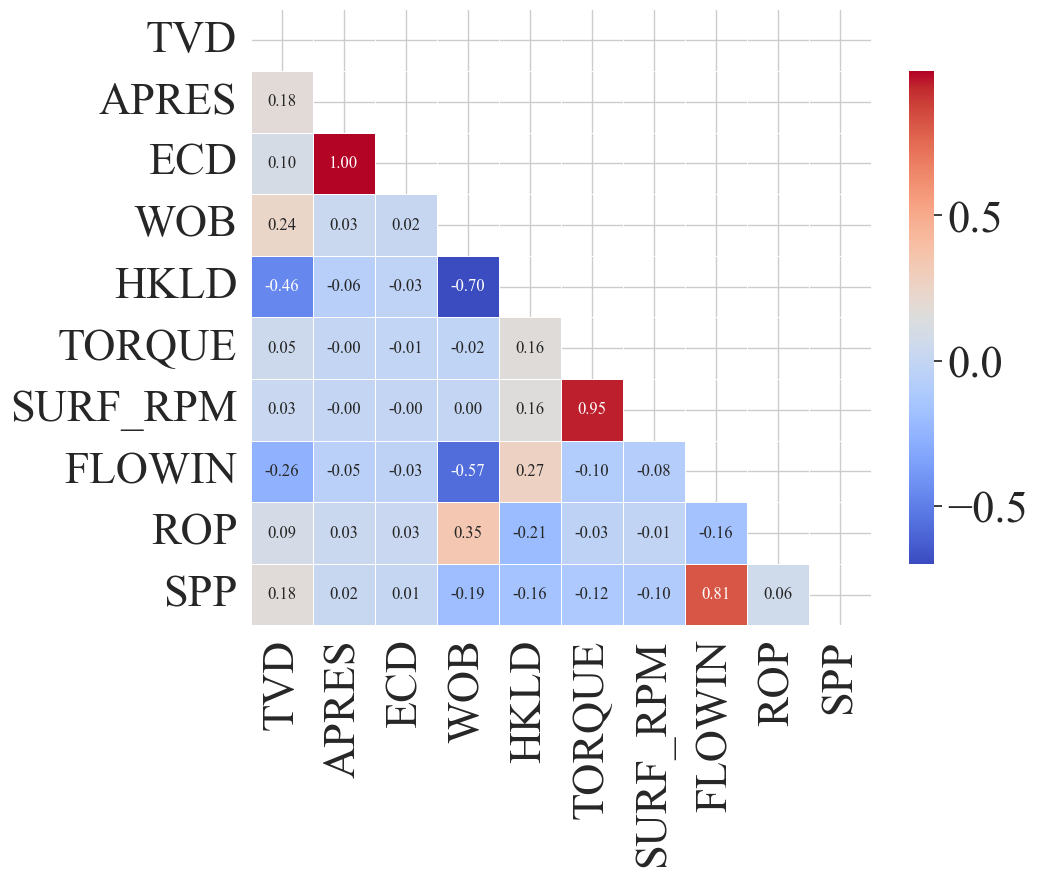

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

# List of columns to include in the correlation matrix
columns = ['TVD', 'APRES', 'ECD', 'WOB', 'HKLD', 'TORQUE', 'SURF_RPM', 'FLOWIN',
       'ROP', 'SPP']

# Calculate the correlation matrix
corr = df[columns].corr()

# Generate a mask for the upper triangle (to display only the lower triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the font to Times New Roman for all text
plt.rcParams['font.family'] = 'Times New Roman'

# Create a heatmap with the mask applied
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

# Set the title
#plt.title('Correlation Matrix', fontsize=16)

# Save the figure if needed
plt.savefig('correlation_matrix_lower_triangle.png', dpi=1000)

# Show the plot
plt.show()


In [13]:
corr=df.corr().T

In [14]:
corr.to_csv('corr.csv')

In [ ]:
corr

In [ ]:
df.columns

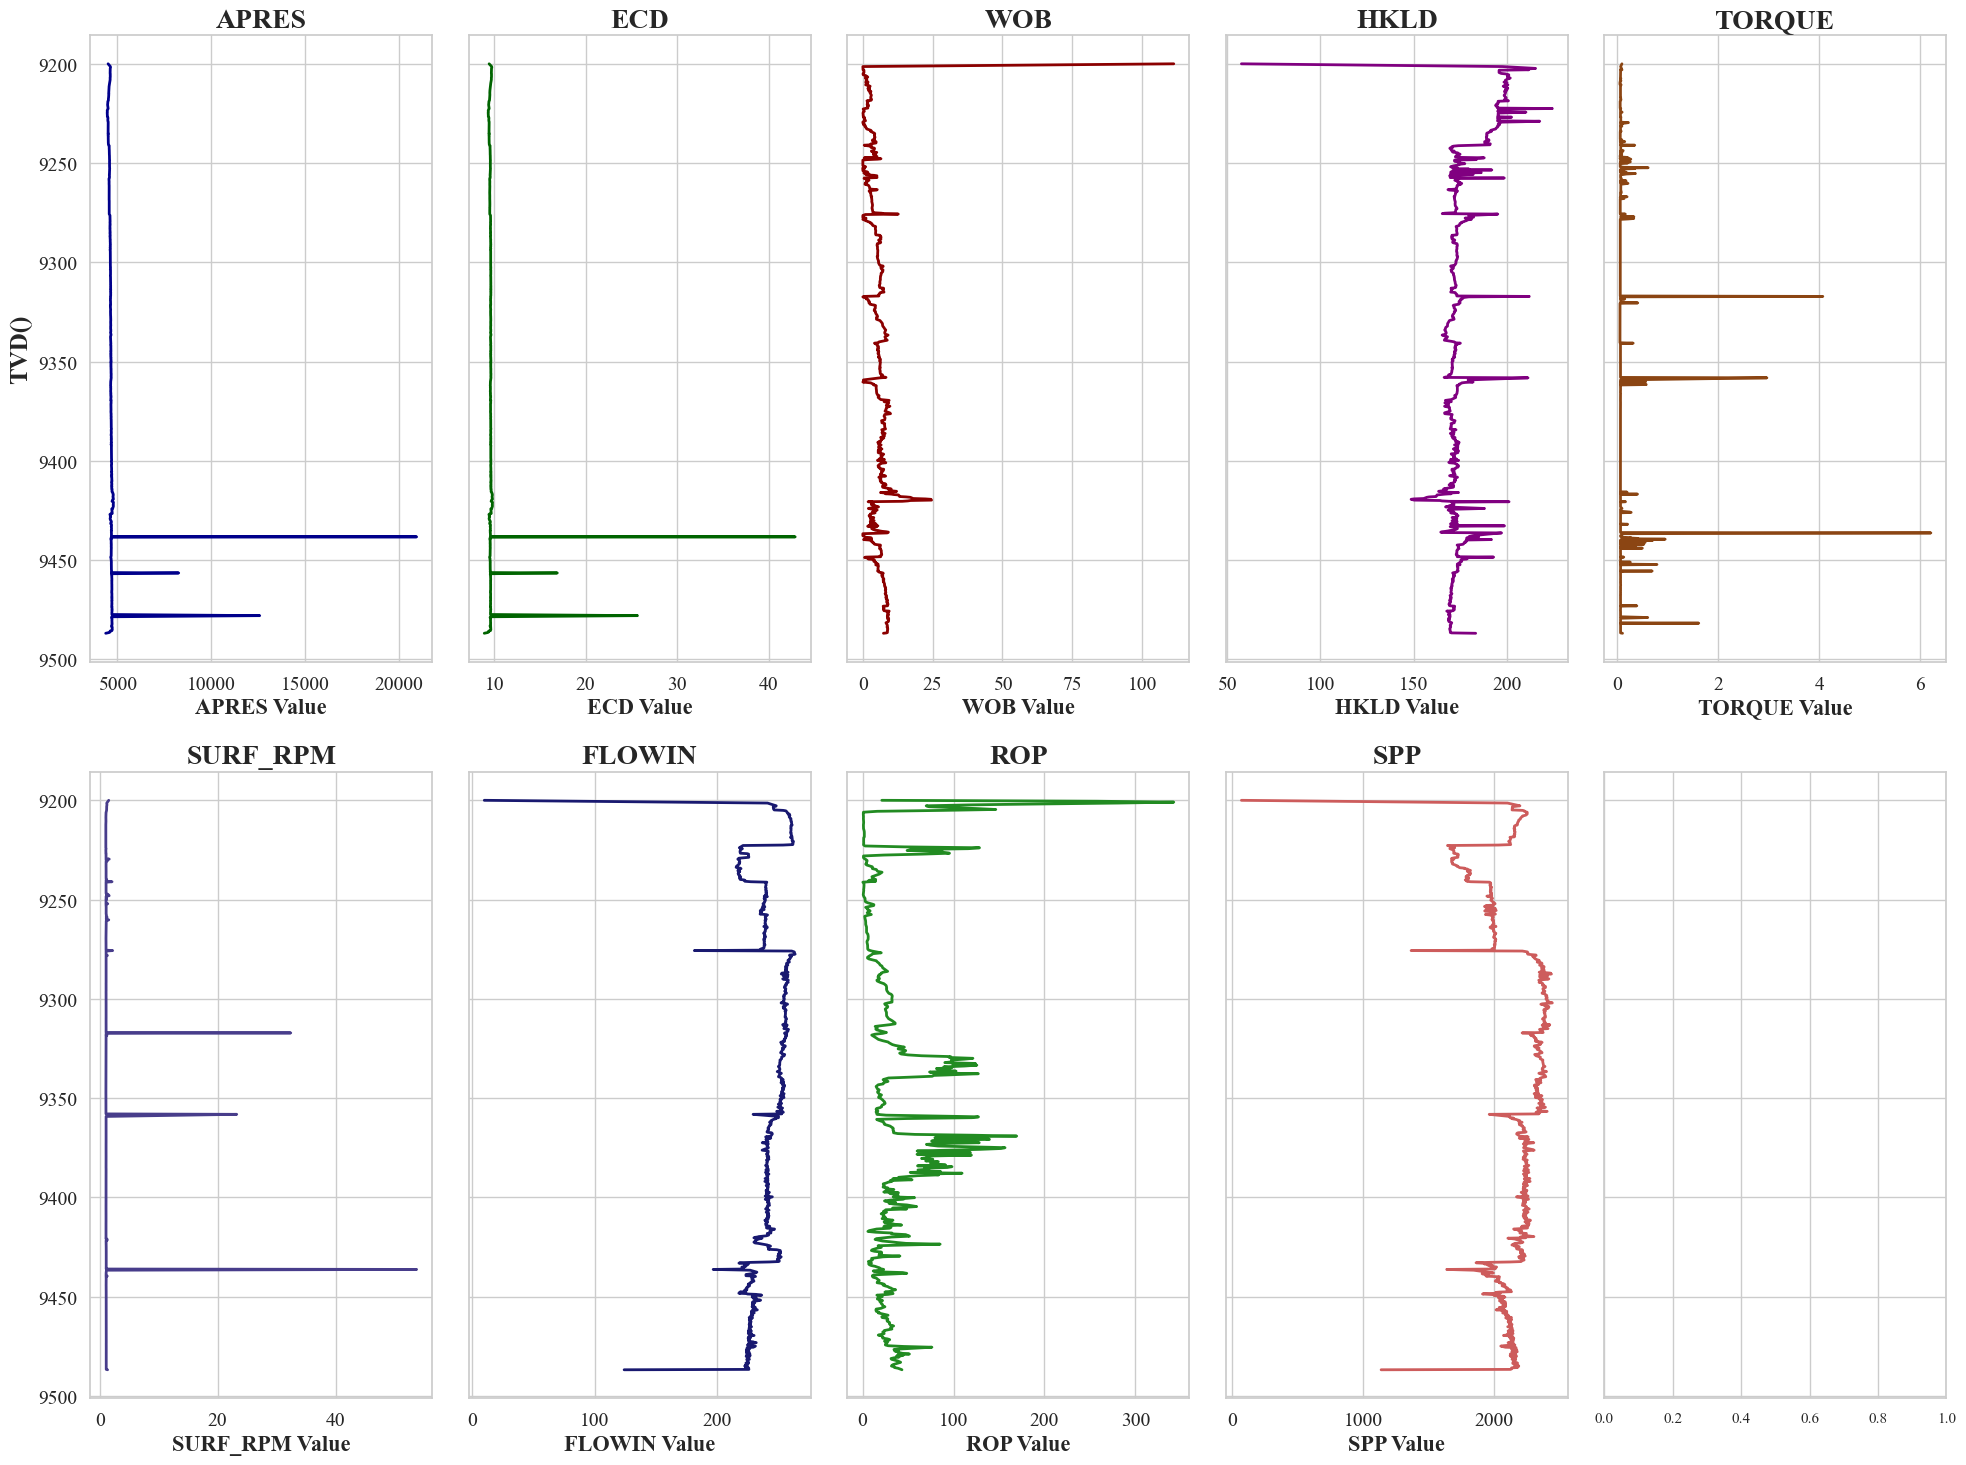

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot (excluding 'TVD' vs 'TVD')
columns = ['APRES', 'ECD', 'WOB', 'HKLD', 'TORQUE', 'SURF_RPM', 'FLOWIN', 'ROP', 'SPP']

# List of colors to use for each plot
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 
          'darkslateblue', 'midnightblue', 'forestgreen', 'indianred']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

# Define the subplot layout (2 rows and 5 columns, one for each log)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 15), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each log
for i, col in enumerate(columns):
    # Plot data vs Depth (TVD)
    axes[i].plot(df[col], df['TVD'], color=colors[i], linewidth=2)

    axes[i].set_title(col, fontsize=20, fontweight='bold')

    # Invert y-axis to have depth increasing downwards
    axes[i].invert_yaxis()

    # Set tick size for both axes
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Major ticks
    axes[i].tick_params(axis='both', which='minor', labelsize=12)  # Minor ticks
    
    # Add ylabel only for the first subplot
    if i == 0:
        axes[i].set_ylabel('TVD()', fontsize=18, fontweight='bold')
    else:
        axes[i].set_ylabel('')

    # Set x-axis label for all plots
    axes[i].set_xlabel(f'{col} Value', fontsize=16, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rd_professional.png', dpi=1000)

# Show plot
plt.show()


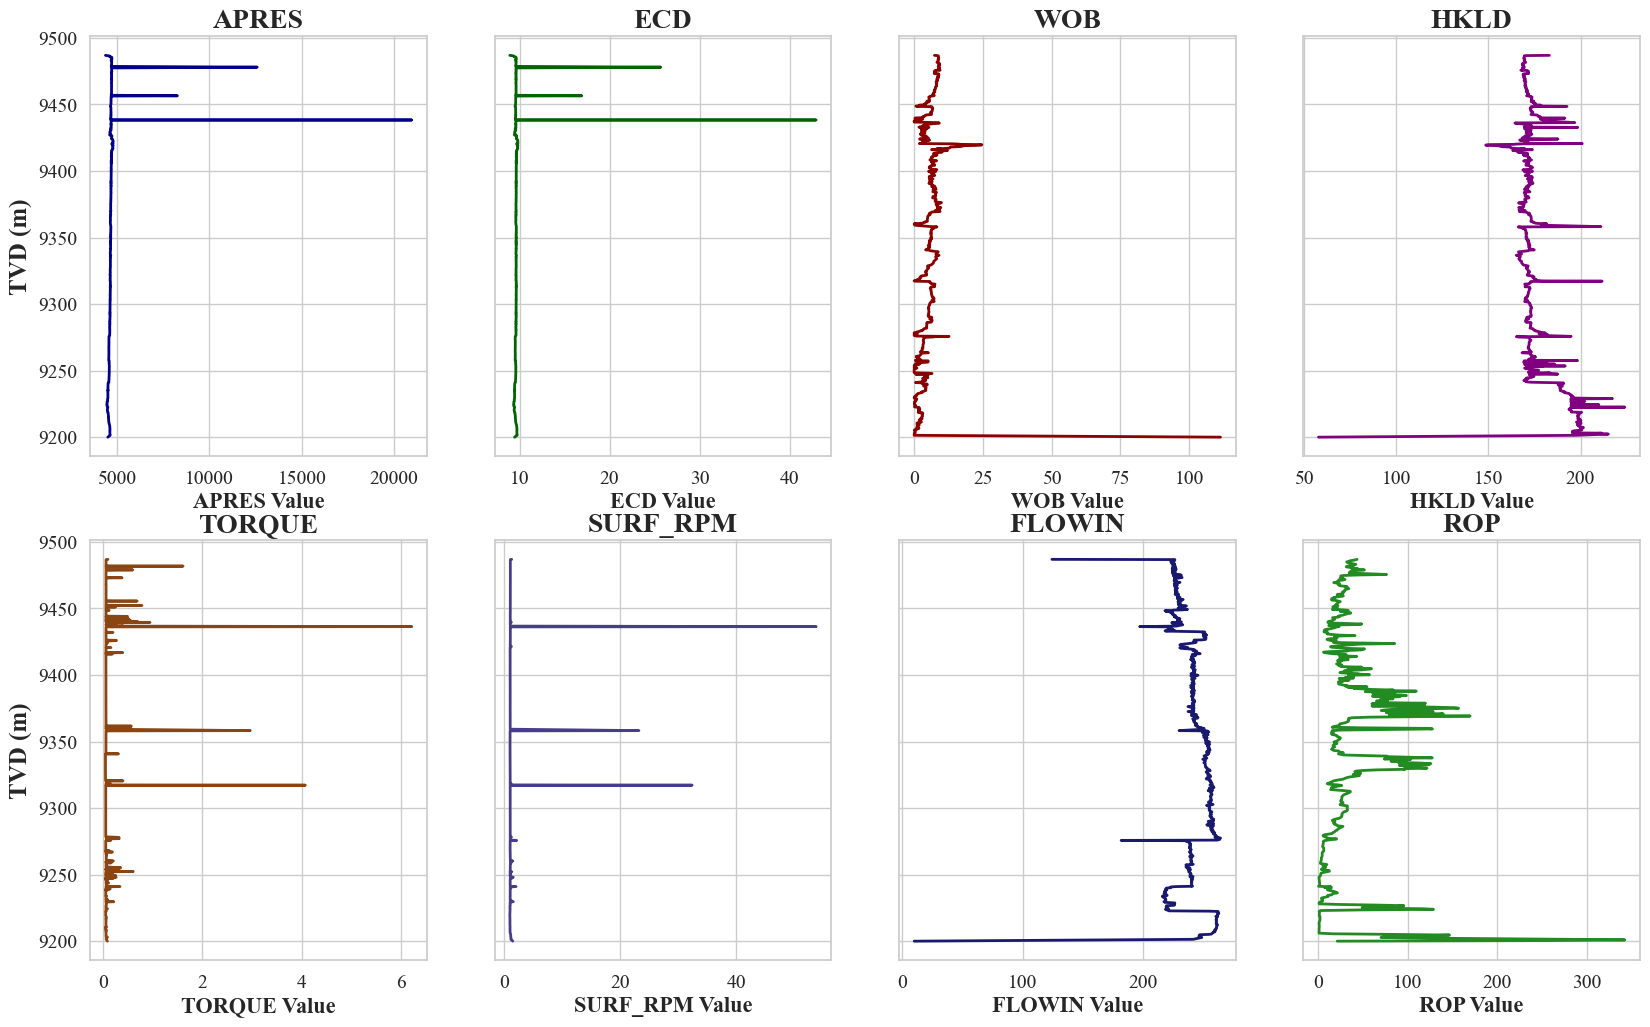

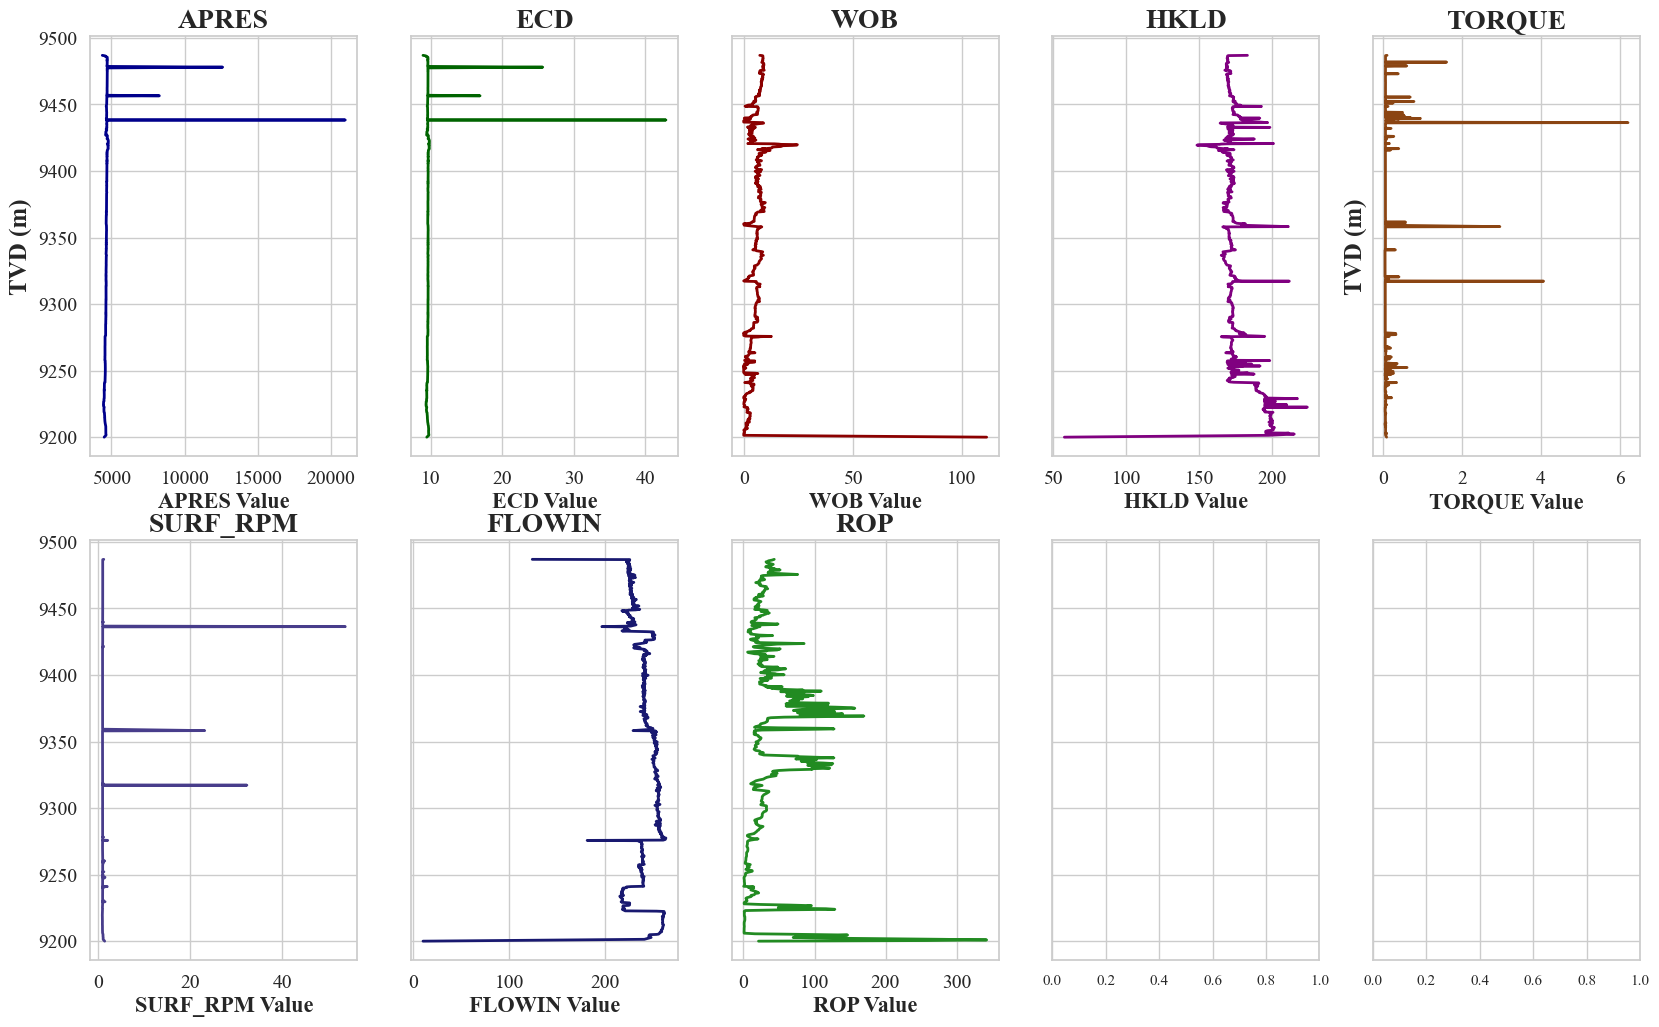

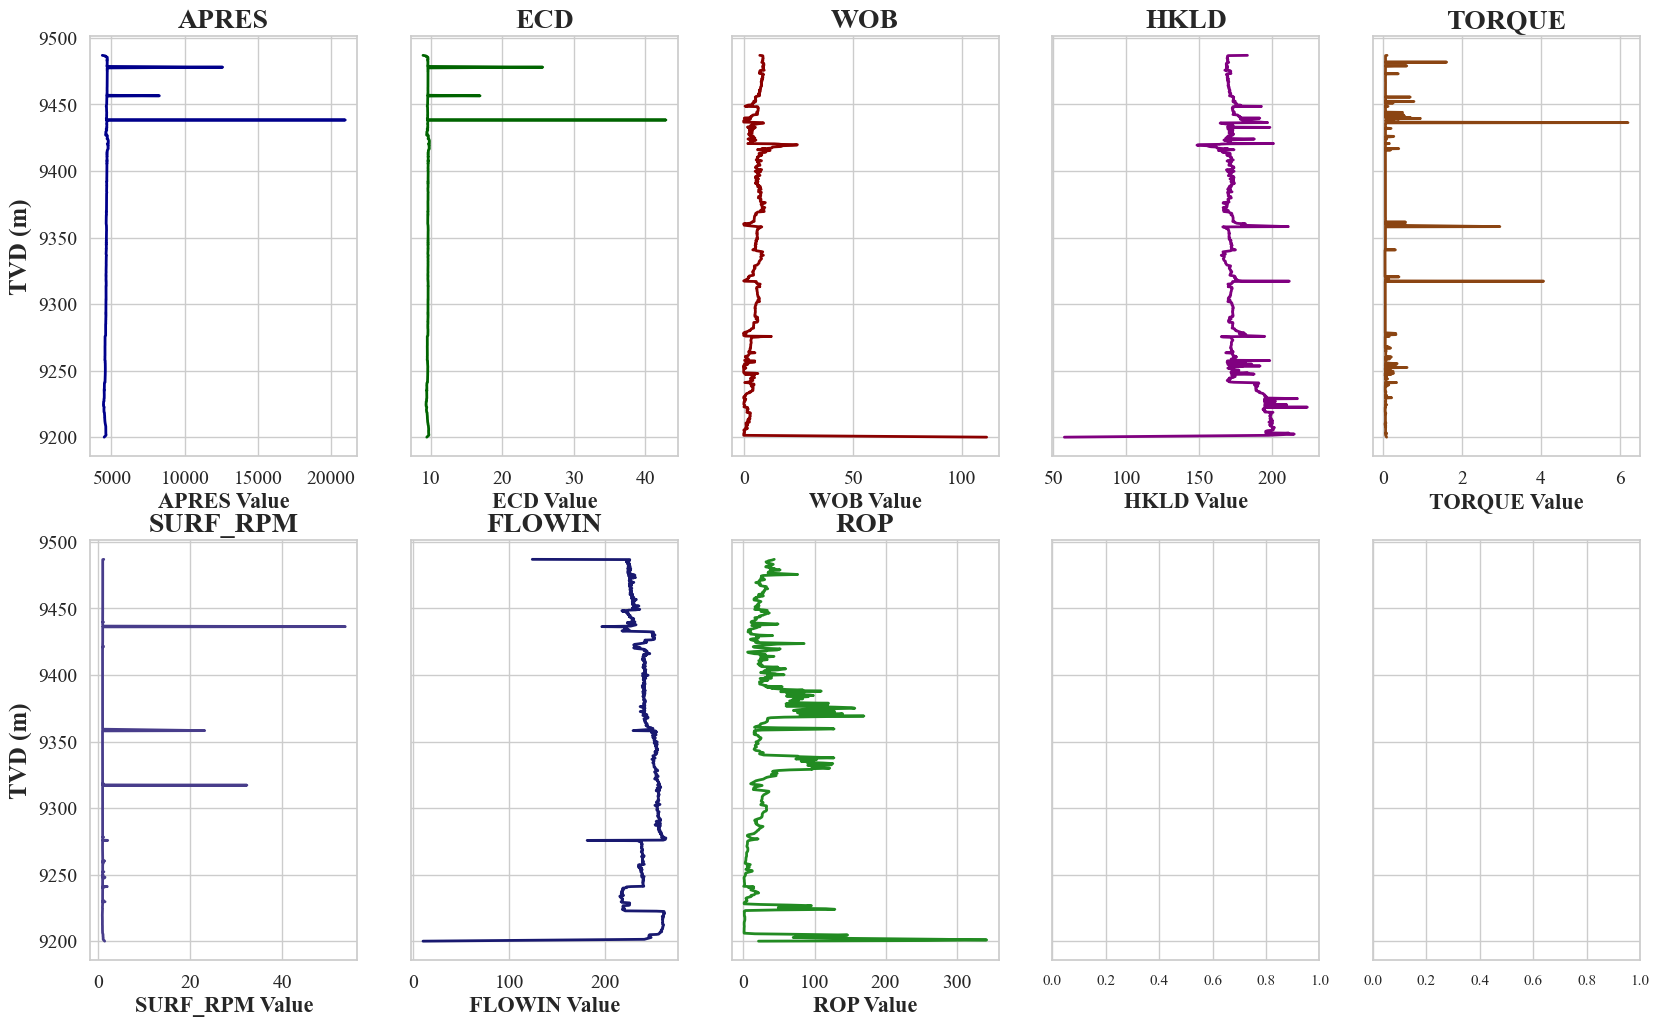

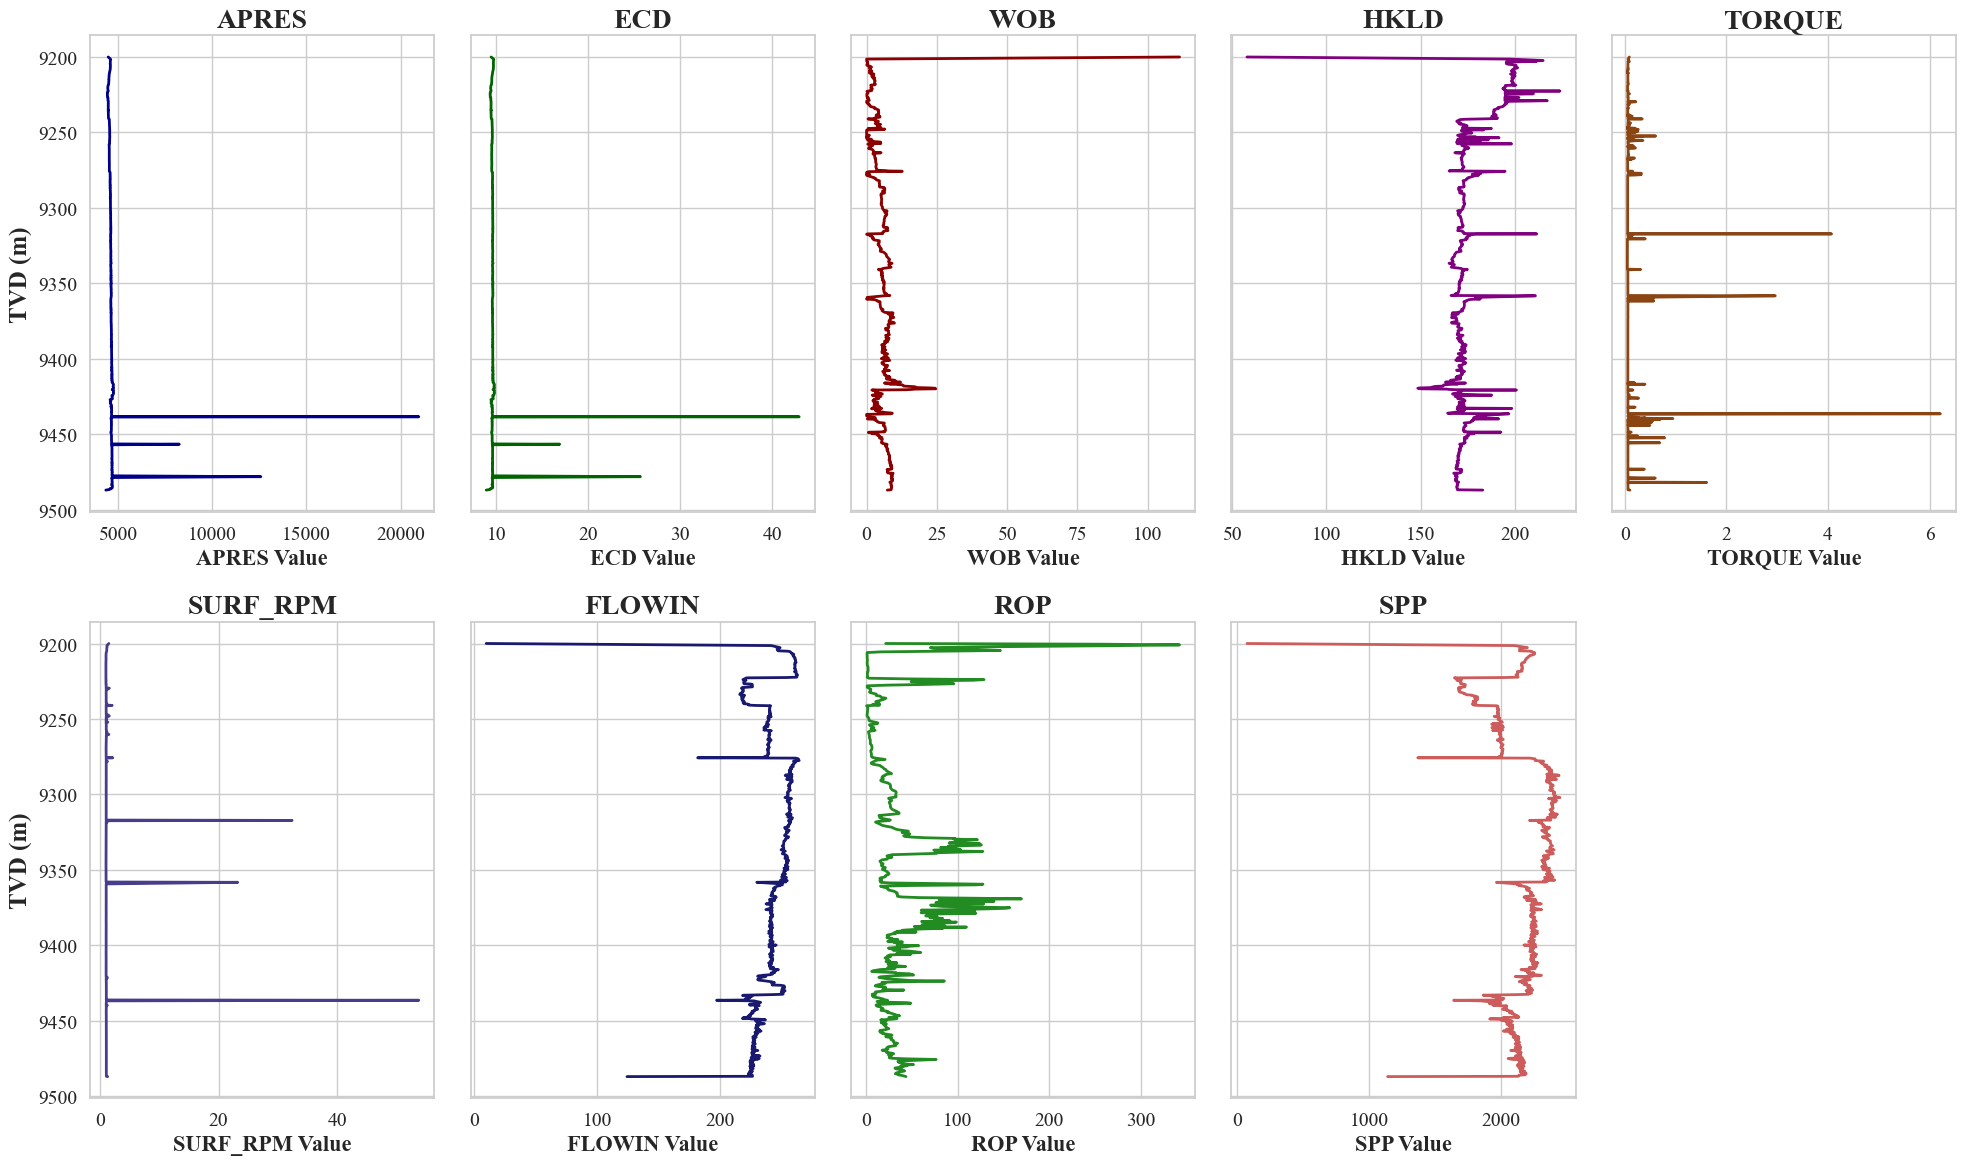

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot
columns = ['APRES', 'ECD', 'WOB', 'HKLD', 'TORQUE', 'SURF_RPM', 'FLOWIN', 'ROP', 'SPP']

# List of colors to use for each plot (updated to 9 colors)
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 
          'darkslateblue', 'midnightblue', 'forestgreen', 'indianred']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

# Define the subplot layout (2 rows and 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each log
for i, col in enumerate(columns):
    # Plot data vs Depth (TVD)
    axes[i].plot(df[col], df['TVD'], color=colors[i], linewidth=2)

    axes[i].set_title(col, fontsize=20, fontweight='bold')

    # Invert y-axis to have depth increasing downwards
    axes[i].invert_yaxis()

    # Set tick size for both axes
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Major ticks
    axes[i].tick_params(axis='both', which='minor', labelsize=12)  # Minor ticks
    
    # Add ylabel only for the first column in each row
    if i % 5 == 0:
        axes[i].set_ylabel('TVD (m)', fontsize=18, fontweight='bold')
    
    # Set x-axis label for all plots
    axes[i].set_xlabel(f'{col} Value', fontsize=16, fontweight='bold')

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rd_professional.png', dpi=1000)

# Show plot
plt.show()


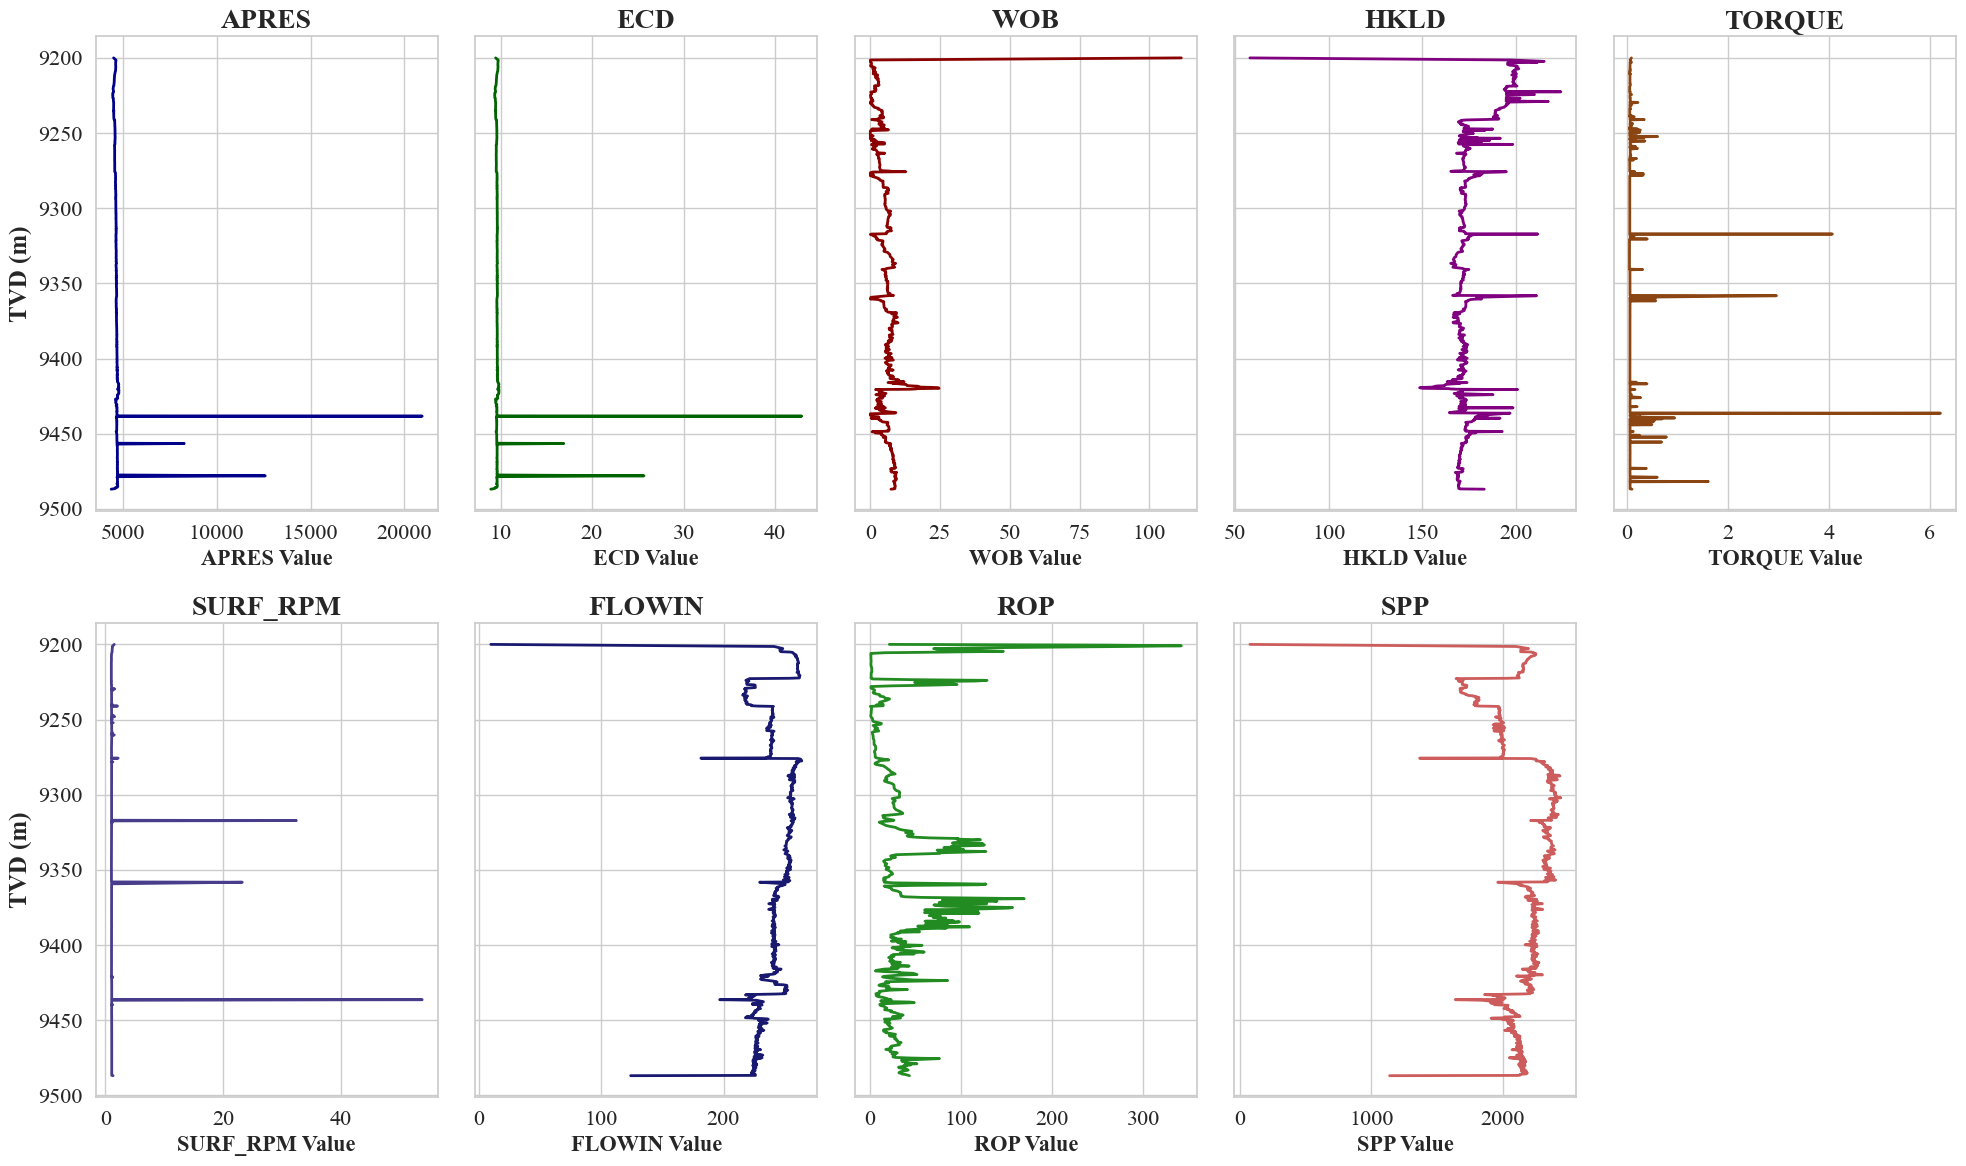

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot
columns = ['APRES', 'ECD', 'WOB', 'HKLD', 'TORQUE', 'SURF_RPM', 'FLOWIN', 'ROP', 'SPP']

# List of colors to use for each plot (updated to 9 colors)
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 
          'darkslateblue', 'midnightblue', 'forestgreen', 'indianred']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

# Define the subplot layout (2 rows and 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each log
for i, col in enumerate(columns):
    # Plot data vs Depth (TVD)
    axes[i].plot(df[col], df['TVD'], color=colors[i], linewidth=2)

    axes[i].set_title(col, fontsize=20, fontweight='bold')

    # Invert y-axis to have depth increasing downwards
    axes[i].invert_yaxis()

    # Set tick size for both axes to 16
    axes[i].tick_params(axis='both', which='major', labelsize=16)  # Major ticks
    axes[i].tick_params(axis='both', which='minor', labelsize=16)  # Minor ticks
    
    # Add ylabel only for the first column in each row
    if i % 5 == 0:
        axes[i].set_ylabel('TVD (m)', fontsize=18, fontweight='bold')
    
    # Set x-axis label for all plots
    axes[i].set_xlabel(f'{col} Value', fontsize=16, fontweight='bold')

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rd_professional.png', dpi=1000)

# Show plot
plt.show()


In [4]:
df = pd.read_excel("C:\\Users\\absid\\Downloads\\rank.xlsx")

In [5]:
df

M  Rank
0  HM_3    10
1  HM_1    14
2    GB    22
3  HM_2    23
4   XGB    23
5    CB    34

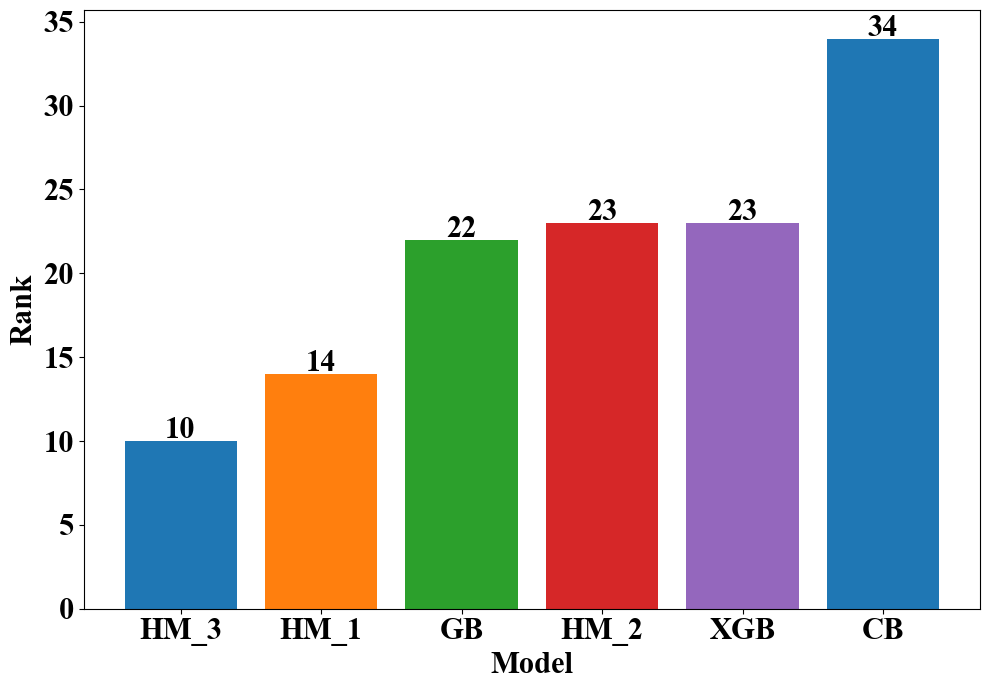

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Times new Roman"
plt.rcParams["font.monospace"] = ["FreeMono"]
# Create the figure and bar plot
plt.figure(figsize=(10,7))
bars = plt.bar(df['M'], df['Rank'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and titles with professional formatting
plt.xlabel('Model', fontsize=22, weight='bold')
plt.ylabel('Rank', fontsize=22, weight='bold')

# Customize ticks for a polished look
plt.xticks(fontsize=22, rotation=0, weight='bold')
plt.yticks(fontsize=22, weight='bold')

# Remove background grid
plt.grid(False)

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.25, f'{height}', 
             ha='center', va='bottom', fontsize=22, color='black', weight='bold')

# Display the plot
plt.tight_layout()
# Save the figure if needed
plt.savefig('model_rank.png', dpi=1000)
plt.show()
# Save the figure if needed



In [7]:
df = pd.read_excel("C:\\Users\\absid\\Downloads\\rank2.xlsx")
df

Ei  Rank
0   RHOZ     9
1    ACC    18
2     RD    20
3     SP    20
4   TNPH    30
5    BDC    34
6  NPHIC    37

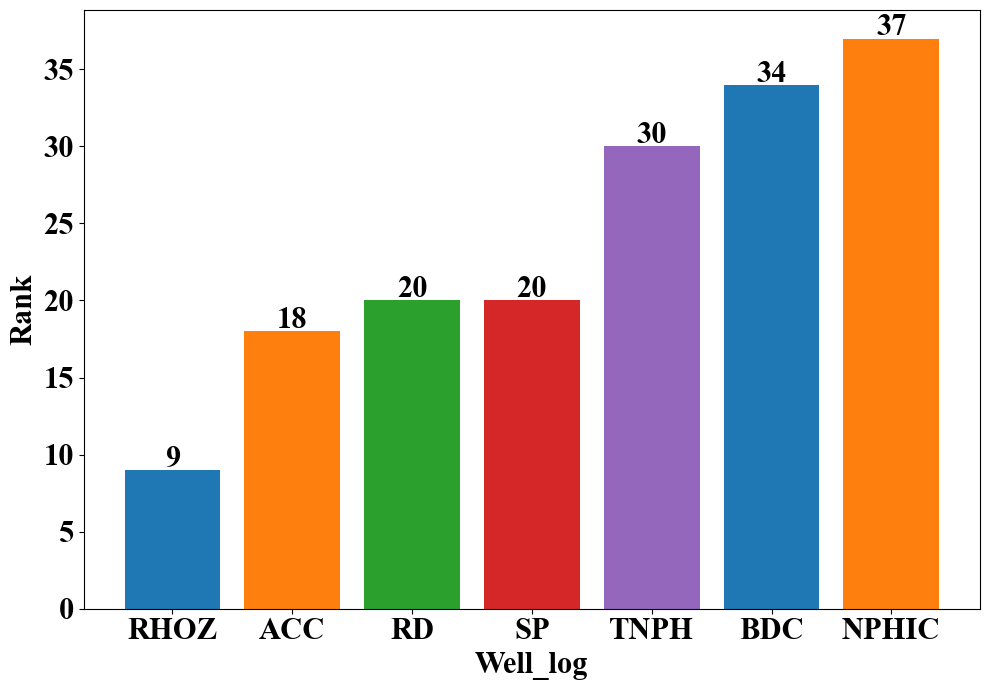

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the figure and bar plot
plt.figure(figsize=(10,7))
bars = plt.bar(df['Ei'], df['Rank'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and titles with professional formatting
plt.xlabel('Well_log', fontsize=22, weight='bold')
plt.ylabel('Rank', fontsize=22, weight='bold')

# Customize ticks for a polished look
plt.xticks(fontsize=22, rotation=0, weight='bold')
plt.yticks(fontsize=22, weight='bold')

# Remove background grid
plt.grid(False)

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.25, f'{height}', 
             ha='center', va='bottom', fontsize=22, color='black', weight='bold')

# Display the plot
plt.tight_layout()
# Save the figure if needed
plt.savefig('input_rank.png', dpi=1000)
plt.show()
# Save the figure if needed

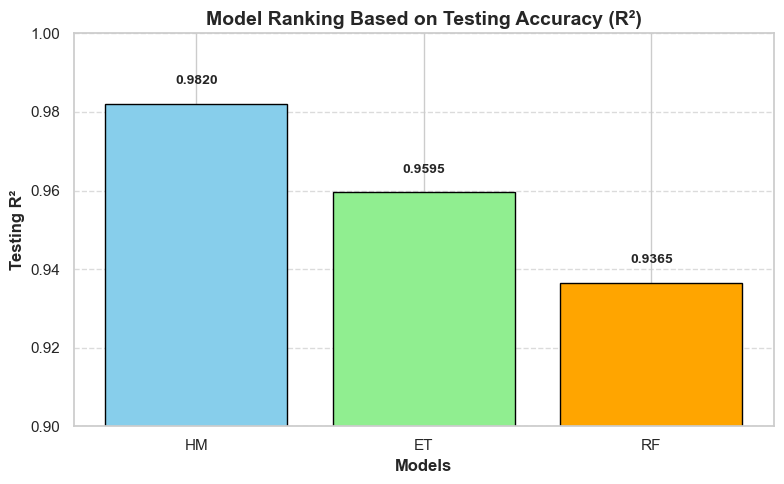

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ET', 'RF', 'HM']
testing_r2 = [0.9595, 0.9365, 0.9820]

# Sort models based on testing R² in descending order
sorted_indices = np.argsort(testing_r2)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_r2 = [testing_r2[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(sorted_models, sorted_r2, color=['skyblue', 'lightgreen', 'orange'], edgecolor='black')

# Add text annotations
for i, r2 in enumerate(sorted_r2):
    plt.text(i, r2 + 0.005, f"{r2:.4f}", ha='center', fontsize=10, fontweight='bold')

# Labels and Title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Testing R²', fontsize=12, fontweight='bold')
plt.title('Model Ranking Based on Testing Accuracy (R²)', fontsize=14, fontweight='bold')
plt.ylim(0.9, 1.0)  # Adjust y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


  Model      R2     MAE   RMSE  Overall Score
2    HM  0.9820   7.909  23.81       0.383479
0    ET  0.9595  12.420  35.76       0.355993
1    RF  0.9365  11.965  44.76       0.347473


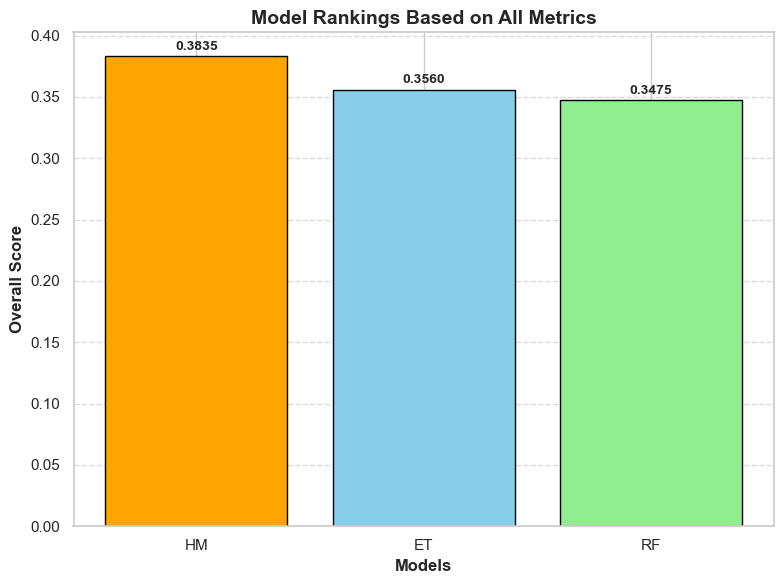

In [15]:
import numpy as np
import pandas as pd

# Data
models = ['ET', 'RF', 'HM']
testing_r2 = [0.9595, 0.9365, 0.9820]
testing_mae = [12.42, 11.965, 7.909]
testing_rmse = [35.76, 44.76, 23.81]

# Weights for metrics
weights = {'R2': 1/3, 'MAE': 1/3, 'RMSE': 1/3}

# Compute scores
inverse_mae = 1 / np.array(testing_mae)
inverse_rmse = 1 / np.array(testing_rmse)
overall_scores = (
    weights['R2'] * np.array(testing_r2) +
    weights['MAE'] * inverse_mae +
    weights['RMSE'] * inverse_rmse
)

# Create a DataFrame for better visualization
data = pd.DataFrame({
    'Model': models,
    'R2': testing_r2,
    'MAE': testing_mae,
    'RMSE': testing_rmse,
    'Overall Score': overall_scores
})

# Sort by overall score
ranked_data = data.sort_values(by='Overall Score', ascending=False)

# Display ranked table
print(ranked_data)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(ranked_data['Model'], ranked_data['Overall Score'], color=['orange', 'skyblue', 'lightgreen'], edgecolor='black')

# Add annotations
for i, score in enumerate(ranked_data['Overall Score']):
    plt.text(i, score + 0.005, f"{score:.4f}", ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Overall Score', fontsize=12, fontweight='bold')
plt.title('Model Rankings Based on All Metrics', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


  Model      R²     MAE   RMSE  Overall Score  Rank
2    HM  0.9820   7.909  23.81       0.383479     1
0    ET  0.9595  12.420  35.76       0.355993     2
1    RF  0.9365  11.965  44.76       0.347473     3


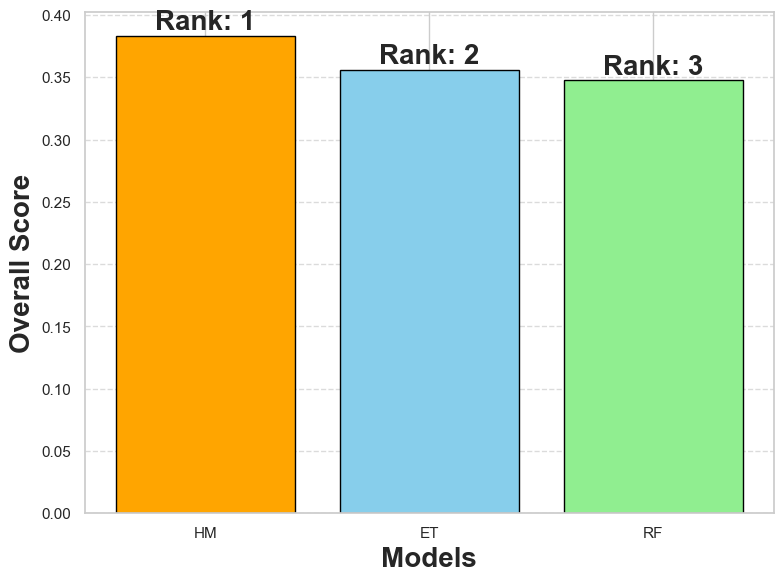

In [20]:
import numpy as np
import pandas as pd

# Data
models = ['ET', 'RF', 'HM']
testing_r2 = [0.9595, 0.9365, 0.9820]
testing_mae = [12.42, 11.965, 7.909]
testing_rmse = [35.76, 44.76, 23.81]

# Weights for metrics
weights = {'R2': 1/3, 'MAE': 1/3, 'RMSE': 1/3}

# Compute scores
inverse_mae = 1 / np.array(testing_mae)
inverse_rmse = 1 / np.array(testing_rmse)
overall_scores = (
    weights['R2'] * np.array(testing_r2) +
    weights['MAE'] * inverse_mae +
    weights['RMSE'] * inverse_rmse
)

# Create a DataFrame for better visualization
data = pd.DataFrame({
    'Model': models,
    'R²': testing_r2,
    'MAE': testing_mae,
    'RMSE': testing_rmse,
    'Overall Score': overall_scores
})

# Add rankings
data['Rank'] = data['Overall Score'].rank(ascending=False).astype(int)

# Sort by rank
ranked_data = data.sort_values(by='Rank')

# Display ranked table
print(ranked_data)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(ranked_data['Model'], ranked_data['Overall Score'], color=['orange', 'skyblue', 'lightgreen'], edgecolor='black')

# Add annotations
for i, rank in enumerate(ranked_data['Rank']):
    plt.text(i, ranked_data['Overall Score'].iloc[i] + 0.005, f"Rank: {rank}", ha='center', fontsize=20, fontweight='bold')

# Labels and title
plt.xlabel('Models', fontsize=20, fontweight='bold')
plt.ylabel('Overall Score', fontsize=20, fontweight='bold')
#plt.title('Model Rankings Based on All Metrics', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('rank.png',dpi=1000)
plt.show()


In [18]:
ranked_data.to_csv('RANKING.CSV')

In [22]:
df=pd.read_excel('score.xlsx')

In [23]:
df.head()

y_test_et  y_test_pred_et  y_test_rf  y_test_pred_rf  y_test_hm  \
0  2178.7768     2177.161650  2178.7768     2176.536053  2178.7768   
1  1887.4944     1911.195251  1887.4944     1922.381680  1887.4944   
2  2152.4657     2153.718754  2152.4657     2156.347993  2152.4657   
3  2355.5820     2364.392030  2355.5820     2365.035817  2355.5820   
4  2240.9658     2233.239381  2240.9658     2233.865840  2240.9658   

   y_test_pred_hm  
0     2178.965676  
1     1884.443695  
2     2151.410994  
3     2357.930020  
4     2235.197830

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data (replace with your actual data)
# _test_et, y_test_pred_et, y_test_rf, y_test_pred_rf, y_test_hm, y_test_pred_hm

# Create some sample data for demonstration (replace with actual data)
df=pd.read_excel('score.xlsx')

# Set up the figure with subplots (1 row, 2 columns for each pair)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot for _test_et vs y_test_pred_et
axes[0, 0].plot(y_test_et, label="True _test_et", color="blue", linewidth=2)
axes[0, 0].plot(y_test_pred_et, label="Predicted _test_et", color="red", linestyle="--")
axes[0, 0].set_title("Line Plot: _test_et vs y_test_pred_et")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Value")
axes[0, 0].legend()

# Residual Plot for _test_et vs y_test_pred_et
axes[0, 1].scatter(_test_et, _test_et - y_test_pred_et, color="blue")
axes[0, 1].axhline(y=0, color='black', linestyle="--")
axes[0, 1].set_title("Residual Plot: _test_et vs y_test_pred_et")
axes[0, 1].set_xlabel("True _test_et")
axes[0, 1].set_ylabel("Residuals")

# Plot for y_test_rf vs y_test_pred_rf
axes[1, 0].plot(y_test_rf, label="True y_test_rf", color="green", linewidth=2)
axes[1, 0].plot(y_test_pred_rf, label="Predicted y_test_rf", color="orange", linestyle="--")
axes[1, 0].set_title("Line Plot: y_test_rf vs y_test_pred_rf")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Value")
axes[1, 0].legend()

# Residual Plot for y_test_rf vs y_test_pred_rf
axes[1, 1].scatter(y_test_rf, y_test_rf - y_test_pred_rf, color="green")
axes[1, 1].axhline(y=0, color='black', linestyle="--")
axes[1, 1].set_title("Residual Plot: y_test_rf vs y_test_pred_rf")
axes[1, 1].set_xlabel("True y_test_rf")
axes[1, 1].set_ylabel("Residuals")

# Plot for y_test_hm vs y_test_pred_hm
axes[2, 0].plot(y_test_hm, label="True y_test_hm", color="purple", linewidth=2)
axes[2, 0].plot(y_test_pred_hm, label="Predicted y_test_hm", color="red", linestyle="--")
axes[2, 0].set_title("Line Plot: y_test_hm vs y_test_pred_hm")
axes[2, 0].set_xlabel("Index")
axes[2, 0].set_ylabel("Value")
axes[2, 0].legend()

# Residual Plot for y_test_hm vs y_test_pred_hm
axes[2, 1].scatter(y_test_hm, y_test_hm - y_test_pred_hm, color="purple")
axes[2, 1].axhline(y=0, color='black', linestyle="--")
axes[2, 1].set_title("Residual Plot: y_test_hm vs y_test_pred_hm")
axes[2, 1].set_xlabel("True y_test_hm")
axes[2, 1].set_ylabel("Residuals")

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()


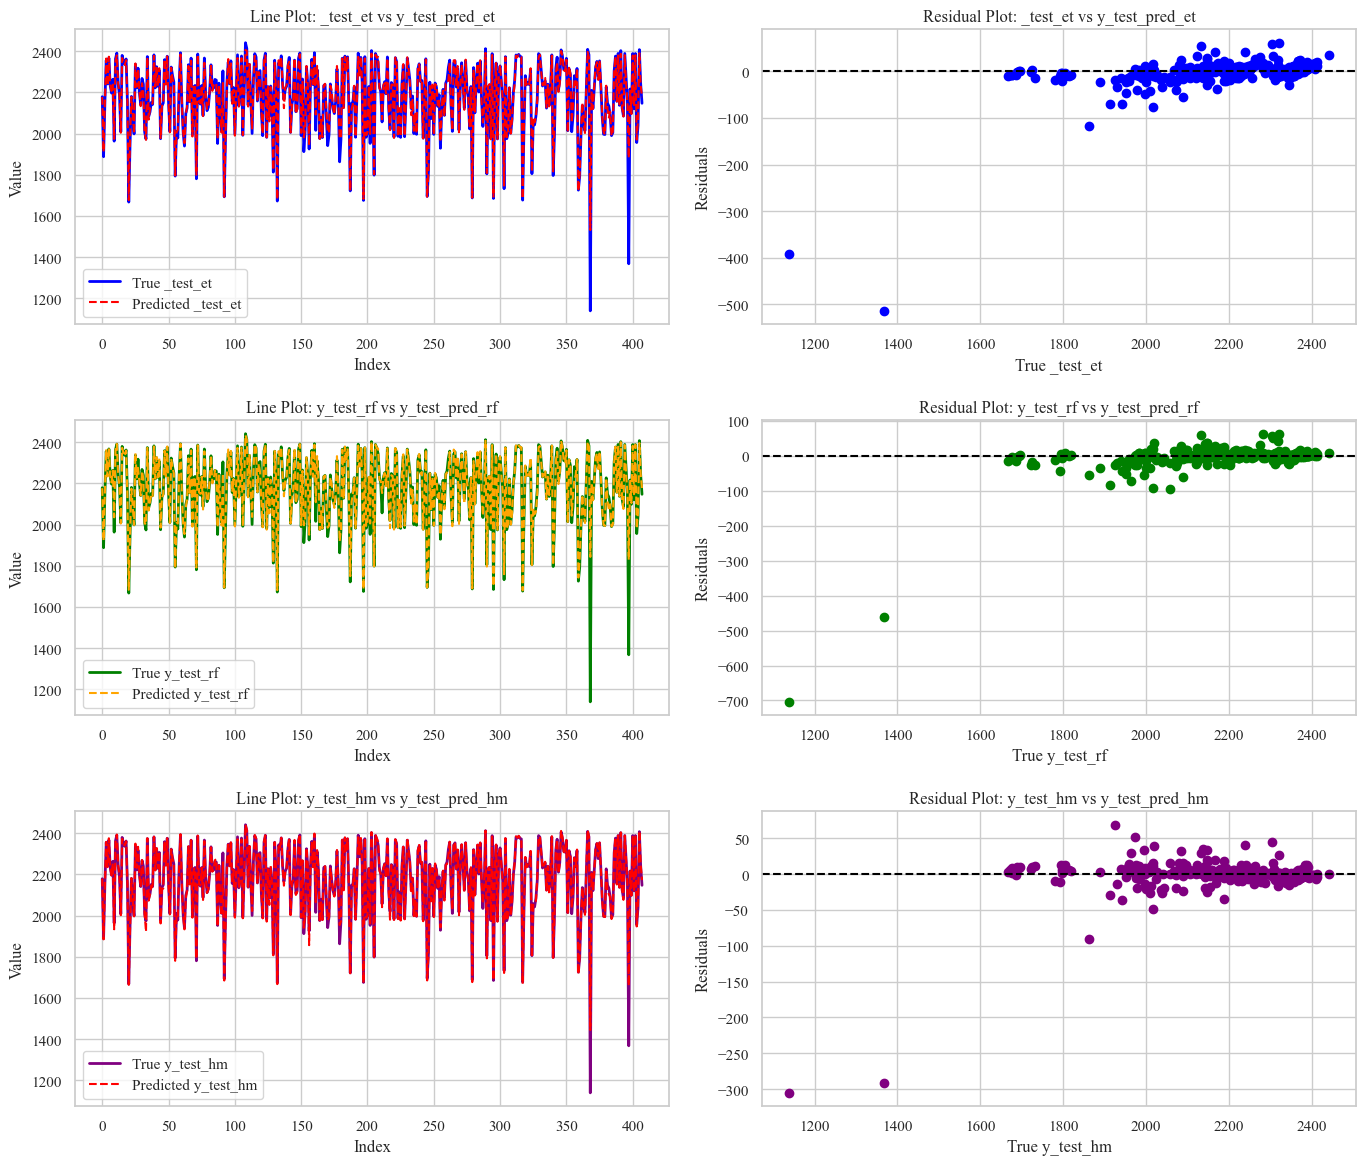

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
# Assuming columns in your dataframe are named exactly as the following
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Set up the figure with subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot for _test_et vs y_test_pred_et
axes[0, 0].plot(y_test_et, label="True _test_et", color="blue", linewidth=2)
axes[0, 0].plot(y_test_pred_et, label="Predicted _test_et", color="red", linestyle="--")
axes[0, 0].set_title("Line Plot: _test_et vs y_test_pred_et")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Value")
axes[0, 0].legend()

# Residual Plot for _test_et vs y_test_pred_et
axes[0, 1].scatter(y_test_et, y_test_et - y_test_pred_et, color="blue")
axes[0, 1].axhline(y=0, color='black', linestyle="--")
axes[0, 1].set_title("Residual Plot: _test_et vs y_test_pred_et")
axes[0, 1].set_xlabel("True _test_et")
axes[0, 1].set_ylabel("Residuals")

# Plot for y_test_rf vs y_test_pred_rf
axes[1, 0].plot(y_test_rf, label="True y_test_rf", color="green", linewidth=2)
axes[1, 0].plot(y_test_pred_rf, label="Predicted y_test_rf", color="orange", linestyle="--")
axes[1, 0].set_title("Line Plot: y_test_rf vs y_test_pred_rf")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Value")
axes[1, 0].legend()

# Residual Plot for y_test_rf vs y_test_pred_rf
axes[1, 1].scatter(y_test_rf, y_test_rf - y_test_pred_rf, color="green")
axes[1, 1].axhline(y=0, color='black', linestyle="--")
axes[1, 1].set_title("Residual Plot: y_test_rf vs y_test_pred_rf")
axes[1, 1].set_xlabel("True y_test_rf")
axes[1, 1].set_ylabel("Residuals")

# Plot for y_test_hm vs y_test_pred_hm
axes[2, 0].plot(y_test_hm, label="True y_test_hm", color="purple", linewidth=2)
axes[2, 0].plot(y_test_pred_hm, label="Predicted y_test_hm", color="red", linestyle="--")
axes[2, 0].set_title("Line Plot: y_test_hm vs y_test_pred_hm")
axes[2, 0].set_xlabel("Index")
axes[2, 0].set_ylabel("Value")
axes[2, 0].legend()

# Residual Plot for y_test_hm vs y_test_pred_hm
axes[2, 1].scatter(y_test_hm, y_test_hm - y_test_pred_hm, color="purple")
axes[2, 1].axhline(y=0, color='black', linestyle="--")
axes[2, 1].set_title("Residual Plot: y_test_hm vs y_test_pred_hm")
axes[2, 1].set_xlabel("True y_test_hm")
axes[2, 1].set_ylabel("Residuals")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


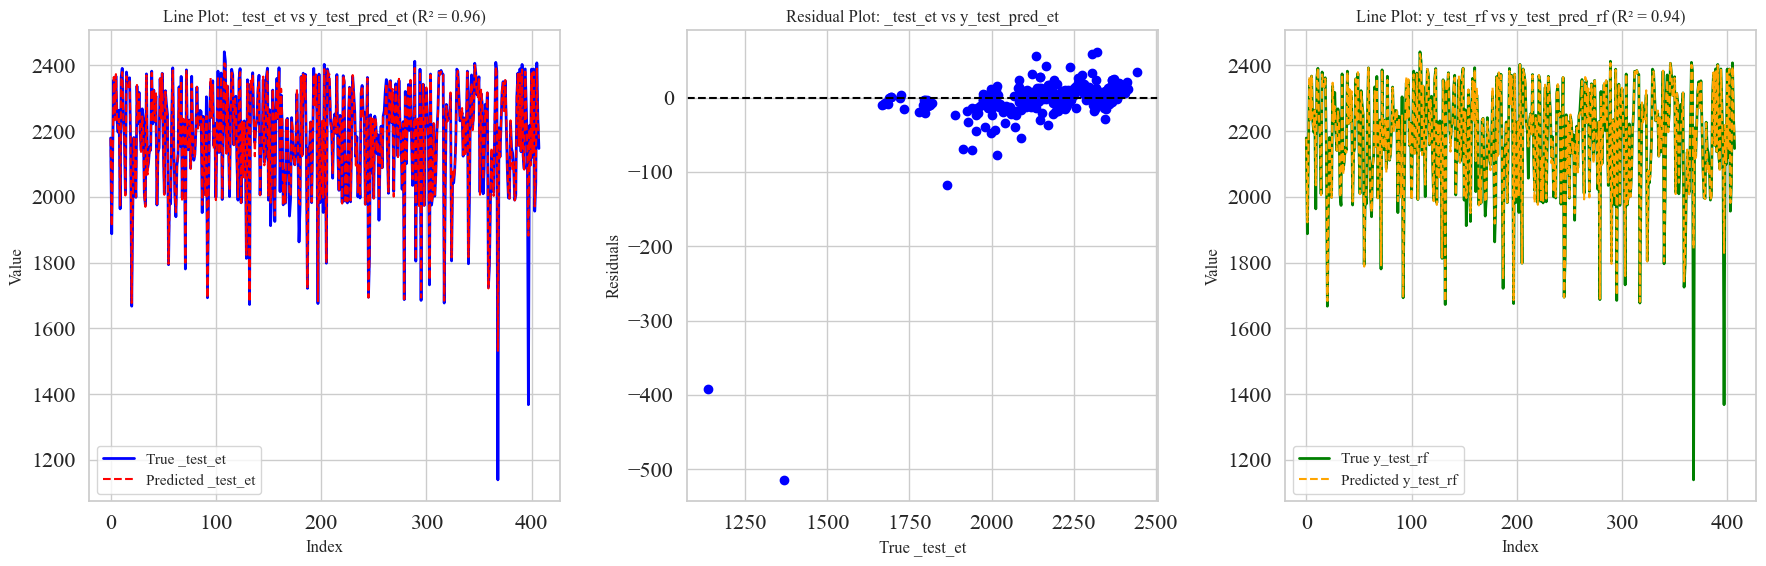

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Compute R² values for each model
r2_et = r2_score(y_test_et, y_test_pred_et)
r2_rf = r2_score(y_test_rf, y_test_pred_rf)
r2_hm = r2_score(y_test_hm, y_test_pred_hm)

# Set up the figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Line Plot for _test_et vs y_test_pred_et
axes[0].plot(y_test_et, label="True _test_et", color="blue", linewidth=2)
axes[0].plot(y_test_pred_et, label="Predicted _test_et", color="red", linestyle="--")
axes[0].set_title(f"Line Plot: _test_et vs y_test_pred_et (R² = {r2_et:.2f})")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].tick_params(axis='both', which='major', labelsize=16)  # Major ticks
axes[0].tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Residual Plot for _test_et vs y_test_pred_et
axes[1].scatter(y_test_et, y_test_et - y_test_pred_et, color="blue")
axes[1].axhline(y=0, color='black', linestyle="--")
axes[1].set_title("Residual Plot: _test_et vs y_test_pred_et")
axes[1].set_xlabel("True _test_et")
axes[1].set_ylabel("Residuals")
axes[1].tick_params(axis='both', which='major', labelsize=16)  # Major ticks
axes[1].tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Line Plot for y_test_rf vs y_test_pred_rf
axes[2].plot(y_test_rf, label="True y_test_rf", color="green", linewidth=2)
axes[2].plot(y_test_pred_rf, label="Predicted y_test_rf", color="orange", linestyle="--")
axes[2].set_title(f"Line Plot: y_test_rf vs y_test_pred_rf (R² = {r2_rf:.2f})")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].tick_params(axis='both', which='major', labelsize=16)  # Major ticks
axes[2].tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


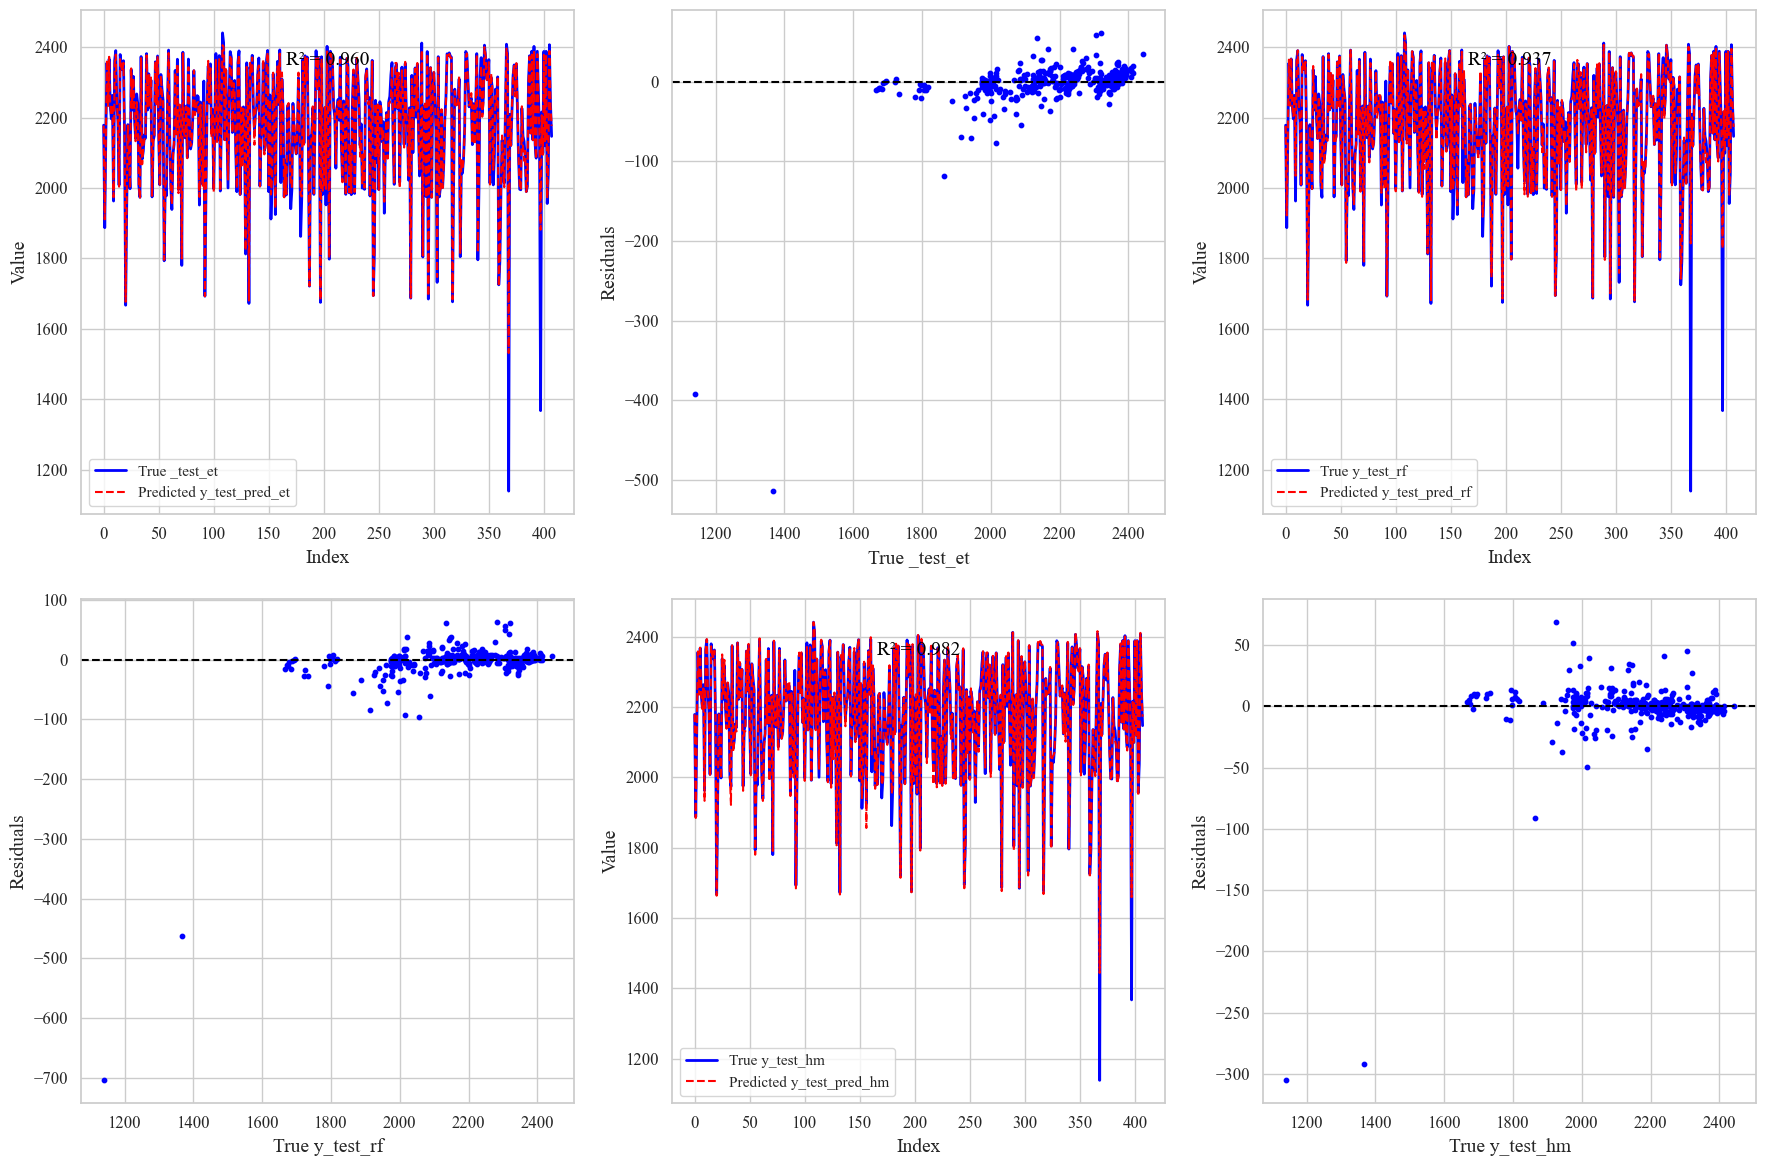

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Set up the figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Function to calculate R² and add it to the plot
def plot_r2(ax, y_true, y_pred, true_label, pred_label):
    r2 = r2_score(y_true, y_pred)
    ax.text(0.5, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=14, ha='center', va='center', color='black')
    ax.plot(y_true, label=f"True {true_label}", color="blue", linewidth=2)
    ax.plot(y_pred, label=f"Predicted {pred_label}", color="red", linestyle="--")
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Value", fontsize=14)
    ax.legend()
    ax.tick_params(axis='both', which='major', labelsize=12)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks

# Residual Plot function
def plot_residual(ax, y_true, y_pred, true_label):
    residuals = y_true - y_pred
    ax.scatter(y_true, residuals, color="blue", s=10)
    ax.axhline(y=0, color='black', linestyle="--")
    ax.set_xlabel(f"True {true_label}", fontsize=14)
    ax.set_ylabel("Residuals", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks

# Plot for _test_et vs y_test_pred_et
plot_r2(axes[0, 0], y_test_et, y_test_pred_et, "_test_et", "y_test_pred_et")
plot_residual(axes[0, 1], y_test_et, y_test_pred_et, "_test_et")

# Plot for y_test_rf vs y_test_pred_rf
plot_r2(axes[0, 2], y_test_rf, y_test_pred_rf, "y_test_rf", "y_test_pred_rf")
plot_residual(axes[1, 0], y_test_rf, y_test_pred_rf, "y_test_rf")

# Plot for y_test_hm vs y_test_pred_hm
plot_r2(axes[1, 1], y_test_hm, y_test_pred_hm, "y_test_hm", "y_test_pred_hm")
plot_residual(axes[1, 2], y_test_hm, y_test_pred_hm, "y_test_hm")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


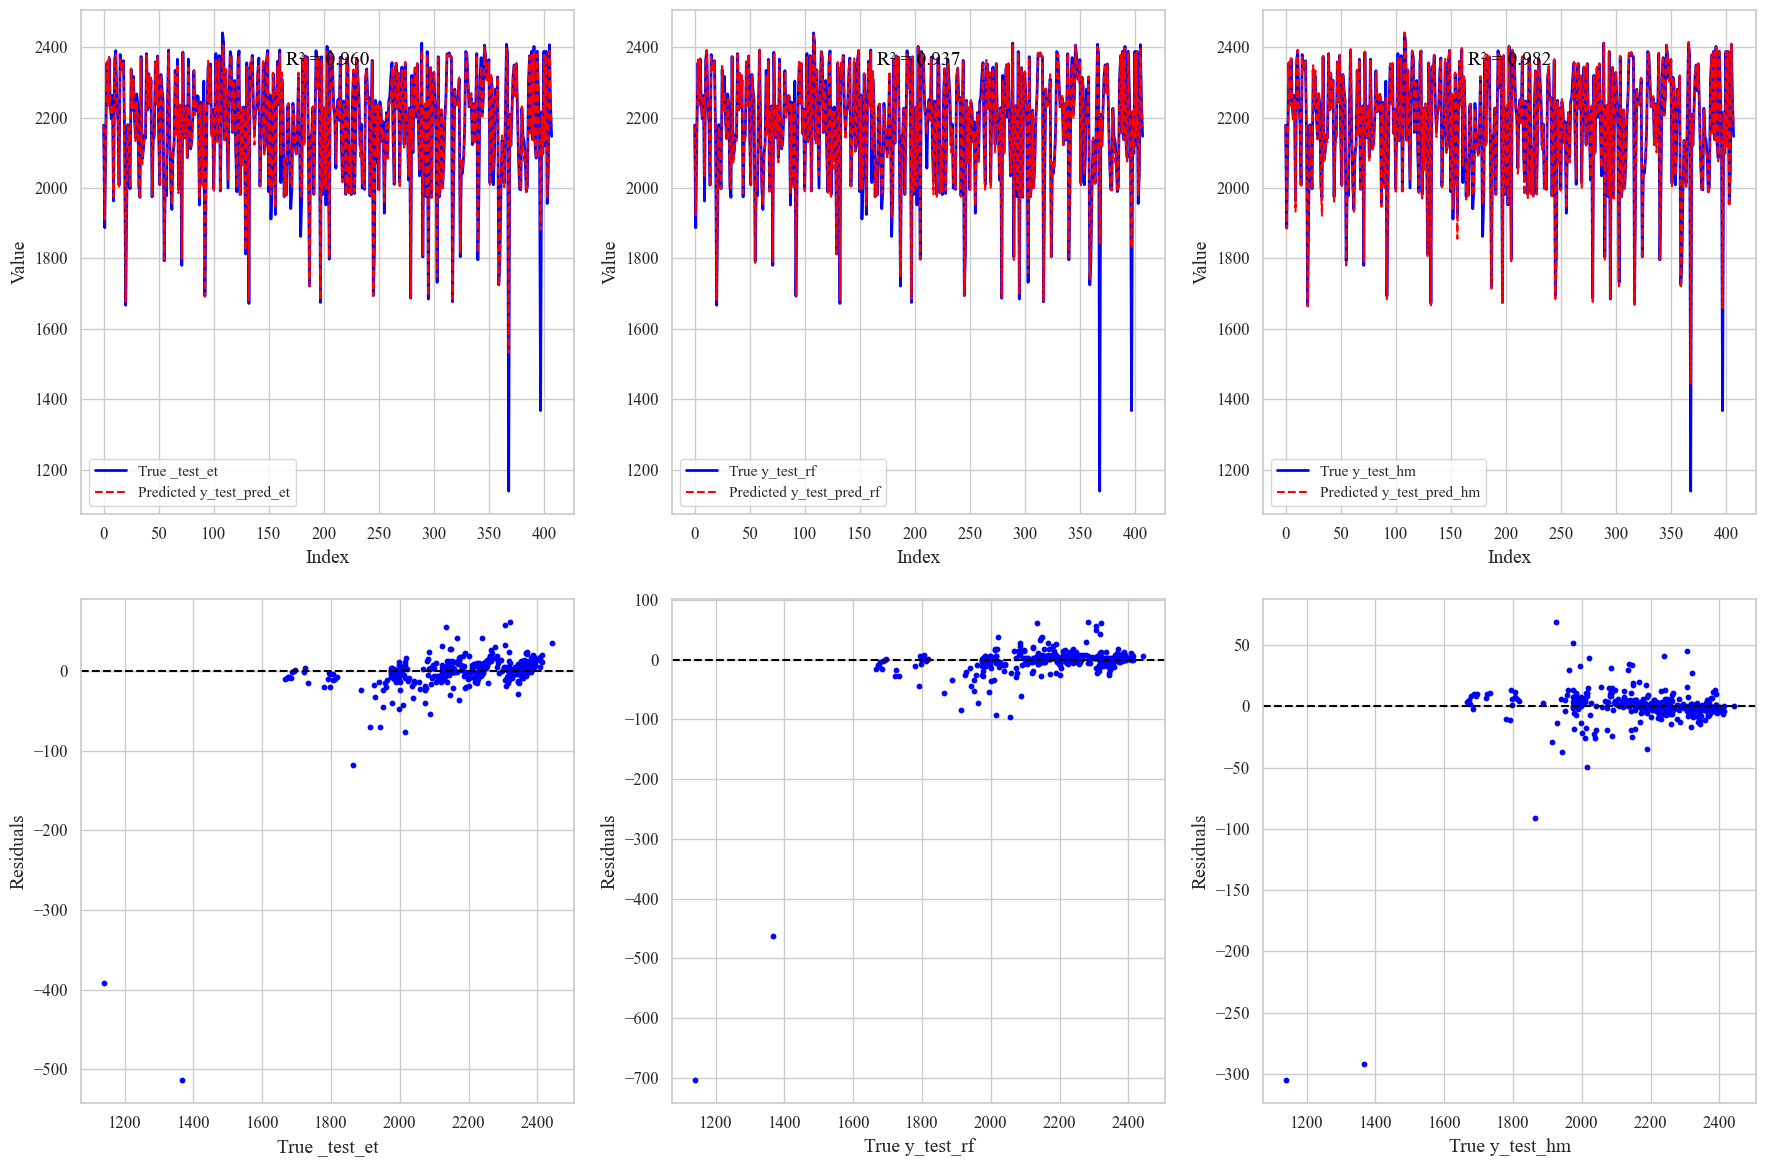

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Set up the figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Function to calculate R² and add it to the plot
def plot_r2(ax, y_true, y_pred, true_label, pred_label):
    r2 = r2_score(y_true, y_pred)
    ax.text(0.5, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=14, ha='center', va='center', color='black')
    ax.plot(y_true, label=f"True {true_label}", color="blue", linewidth=2)
    ax.plot(y_pred, label=f"Predicted {pred_label}", color="red", linestyle="--")
    ax.set_xlabel("Index", fontsize=14)
    ax.set_ylabel("Value", fontsize=14)
    ax.legend()
    ax.tick_params(axis='both', which='major', labelsize=12)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks

# Residual Plot function
def plot_residual(ax, y_true, y_pred, true_label):
    residuals = y_true - y_pred
    ax.scatter(y_true, residuals, color="blue", s=10)
    ax.axhline(y=0, color='black', linestyle="--")
    ax.set_xlabel(f"True {true_label}", fontsize=14)
    ax.set_ylabel("Residuals", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=10)  # Minor ticks

# Upper row: Line plots for et, rf, and hm
plot_r2(axes[0, 0], y_test_et, y_test_pred_et, "_test_et", "y_test_pred_et")
plot_r2(axes[0, 1], y_test_rf, y_test_pred_rf, "y_test_rf", "y_test_pred_rf")
plot_r2(axes[0, 2], y_test_hm, y_test_pred_hm, "y_test_hm", "y_test_pred_hm")

# Lower row: Residual plots for et, rf, and hm
plot_residual(axes[1, 0], y_test_et, y_test_pred_et, "_test_et")
plot_residual(axes[1, 1], y_test_rf, y_test_pred_rf, "y_test_rf")
plot_residual(axes[1, 2], y_test_hm, y_test_pred_hm, "y_test_hm")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


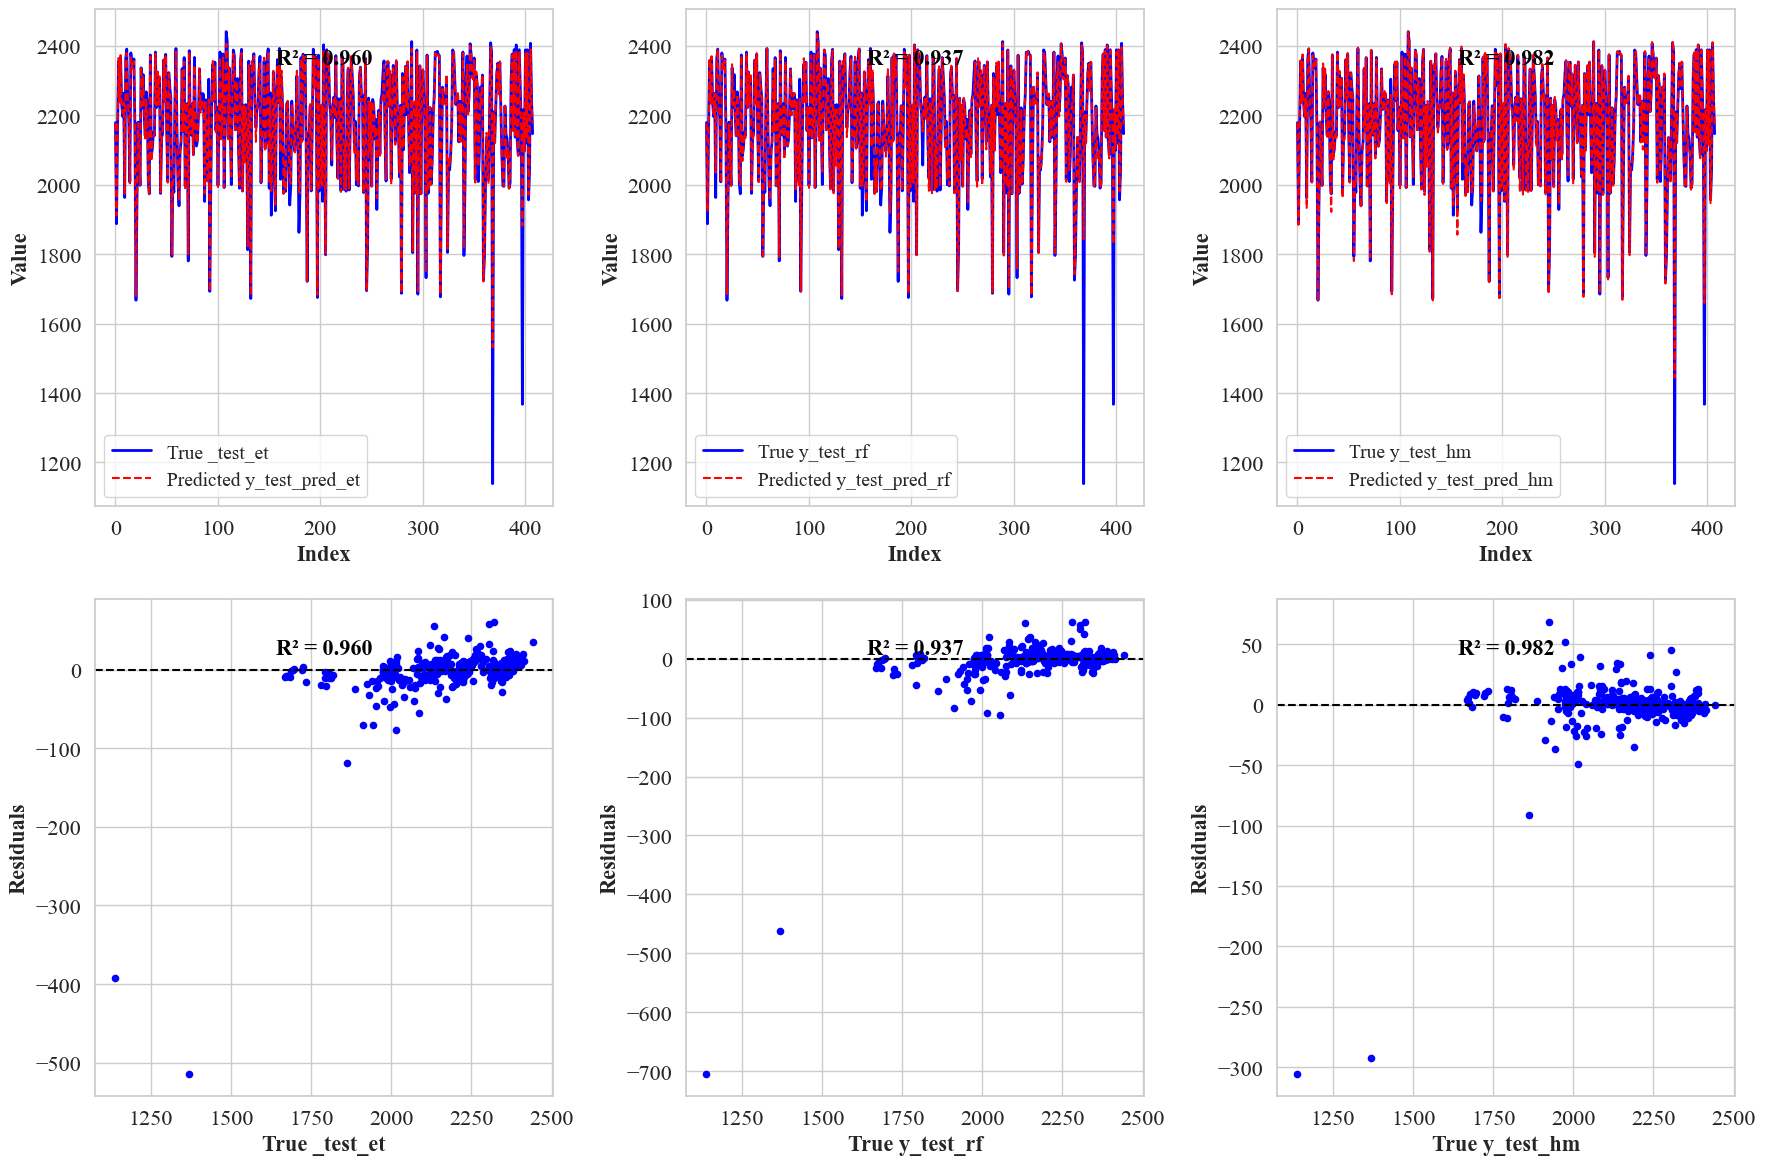

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Set up the figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Function to calculate R² and add it to the plot
def plot_r2(ax, y_true, y_pred, true_label, pred_label):
    r2 = r2_score(y_true, y_pred)
    ax.text(0.5, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=16, ha='center', va='center', color='black', fontweight='bold')
    ax.plot(y_true, label=f"True {true_label}", color="blue", linewidth=2)
    ax.plot(y_pred, label=f"Predicted {pred_label}", color="red", linestyle="--")
    ax.set_xlabel("Index", fontsize=16, fontweight='bold')
    ax.set_ylabel("Value", fontsize=16, fontweight='bold')
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Residual Plot function with R² on the residual plot
def plot_residual(ax, y_true, y_pred, true_label):
    residuals = y_true - y_pred
    r2 = r2_score(y_true, y_pred)
    ax.scatter(y_true, residuals, color="blue", s=20)
    ax.axhline(y=0, color='black', linestyle="--")
    ax.set_xlabel(f"True {true_label}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Residuals", fontsize=16, fontweight='bold')
    ax.text(0.5, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=16, ha='center', va='center', color='black', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Upper row: Line plots for et, rf, and hm
plot_r2(axes[0, 0], y_test_et, y_test_pred_et, "_test_et", "y_test_pred_et")
plot_r2(axes[0, 1], y_test_rf, y_test_pred_rf, "y_test_rf", "y_test_pred_rf")
plot_r2(axes[0, 2], y_test_hm, y_test_pred_hm, "y_test_hm", "y_test_pred_hm")

# Lower row: Residual plots for et, rf, and hm
plot_residual(axes[1, 0], y_test_et, y_test_pred_et, "_test_et")
plot_residual(axes[1, 1], y_test_rf, y_test_pred_rf, "y_test_rf")
plot_residual(axes[1, 2], y_test_hm, y_test_pred_hm, "y_test_hm")

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


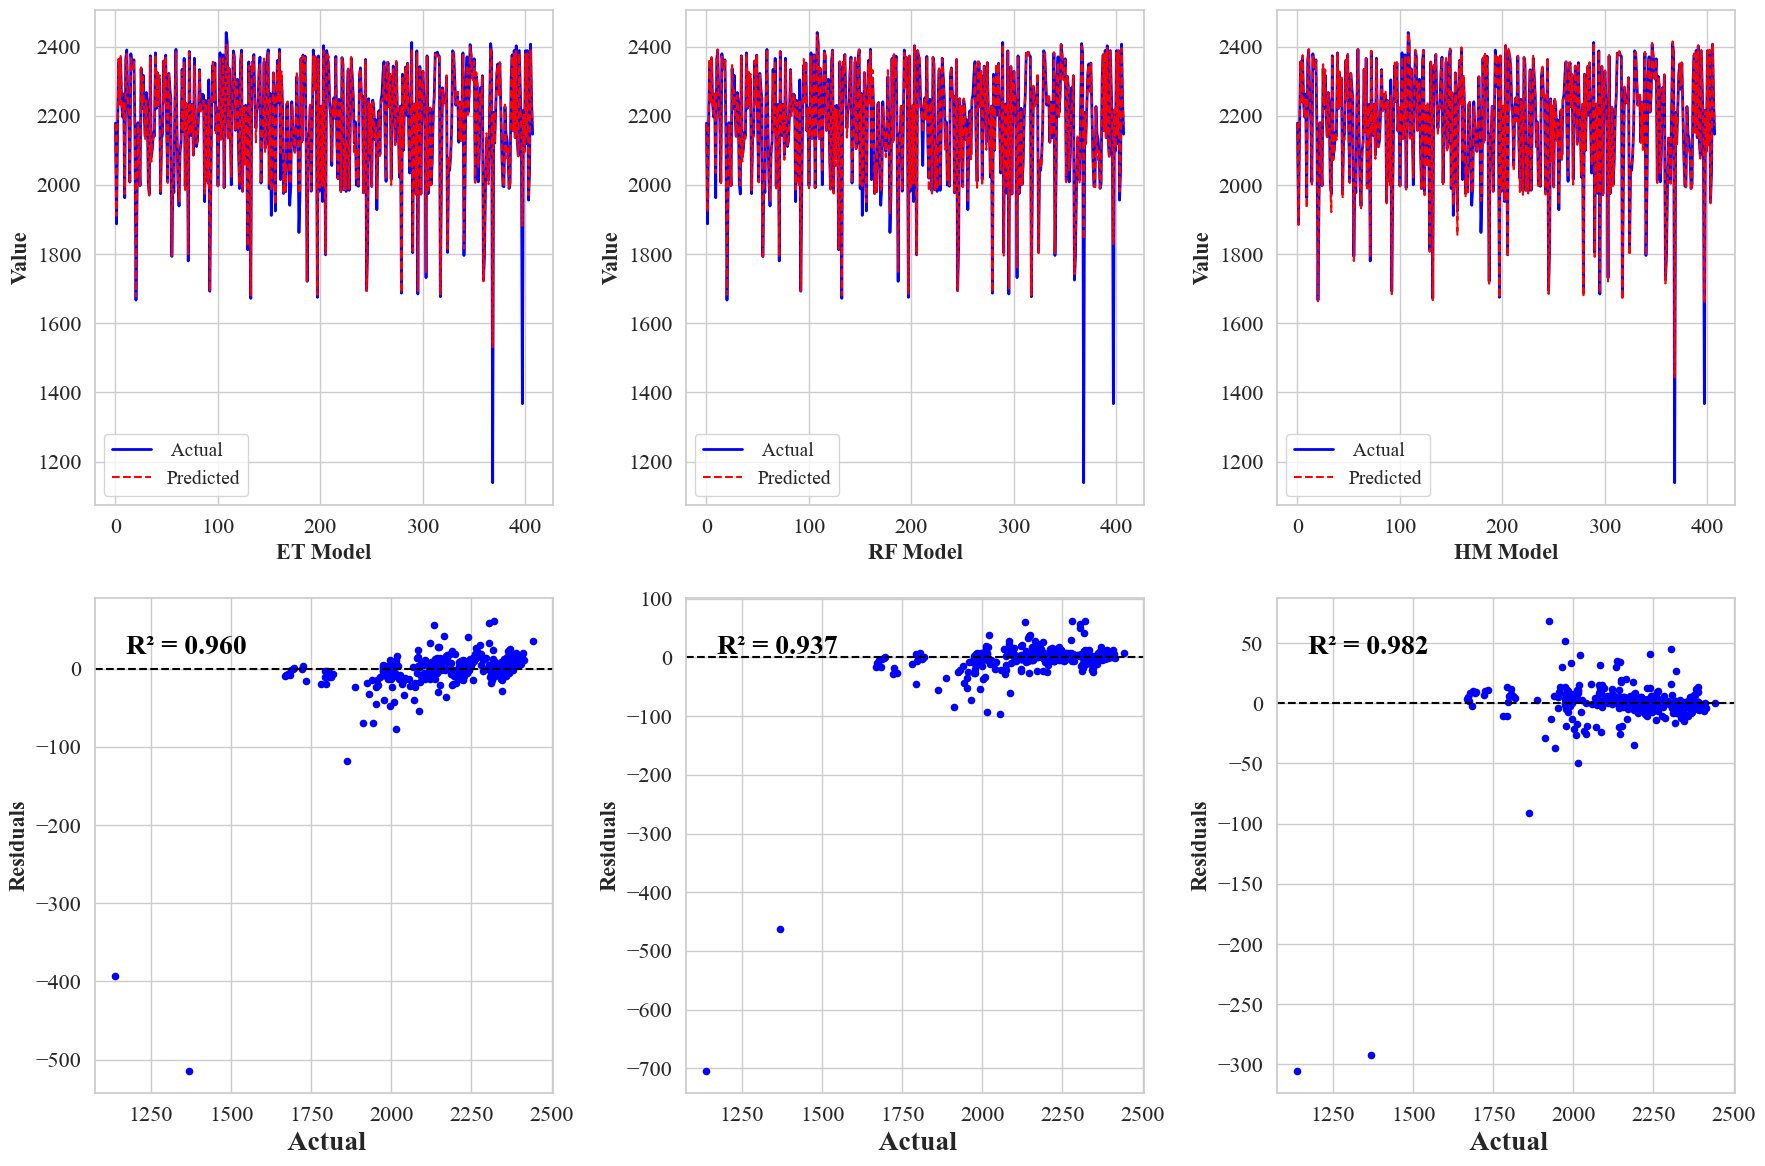

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the data from your Excel file
df = pd.read_excel('score.xlsx')

# Extract the necessary columns from the DataFrame
y_test_et = df['y_test_et']
y_test_pred_et = df['y_test_pred_et']
y_test_rf = df['y_test_rf']
y_test_pred_rf = df['y_test_pred_rf']
y_test_hm = df['y_test_hm']
y_test_pred_hm = df['y_test_pred_hm']

# Set up the figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Function to calculate R² and add it to the plot
def plot_r2(ax, y_true, y_pred, true_label, pred_label, model_name):
    r2 = r2_score(y_true, y_pred)
    #ax.text(0.5, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=16, ha='center', va='center', color='black', fontweight='bold')
    ax.plot(y_true, label=f" {true_label}", color="blue", linewidth=2)
    ax.plot(y_pred, label=f"{pred_label}", color="red", linestyle="--")
    ax.set_xlabel(f"{model_name}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Value", fontsize=16, fontweight='bold')
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=14)  # Minor ticks

# Residual Plot function with R² on the residual plot
def plot_residual(ax, y_true, y_pred, true_label, model_name):
    residuals = y_true - y_pred
    r2 = r2_score(y_true, y_pred)
    ax.scatter(y_true, residuals, color="blue", s=20)
    ax.axhline(y=0, color='black', linestyle="--")
    ax.set_xlabel(f" {true_label}", fontsize=20, fontweight='bold')
    ax.set_ylabel("Residuals", fontsize=16, fontweight='bold')
    ax.text(0.2, 0.9, f'R² = {r2:.3f}', transform=ax.transAxes, fontsize=20, ha='center', va='center', color='black', fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
    ax.tick_params(axis='both', which='minor', labelsize=16)  # Minor ticks

# Upper row: Line plots for et, rf, and hm
plot_r2(axes[0, 0], y_test_et, y_test_pred_et, "Actual", "Predicted", "ET Model")
plot_r2(axes[0, 1], y_test_rf, y_test_pred_rf, "Actual", "Predicted", "RF Model")
plot_r2(axes[0, 2], y_test_hm, y_test_pred_hm, "Actual", "Predicted", "HM Model")

# Lower row: Residual plots for et, rf, and hm
plot_residual(axes[1, 0], y_test_et, y_test_pred_et, "Actual", "ET Model")
plot_residual(axes[1, 1], y_test_rf, y_test_pred_rf, "Actual", "RF Model")
plot_residual(axes[1, 2], y_test_hm, y_test_pred_hm, "Actual", "HM Model")

# Adjust the layout to avoid overlap
plt.tight_layout()

plt.savefig('score.png',dpi=1000)# Show the plot
plt.show()
